Graduate Rotational Internship (GRIP)

January 2023 Batch

Candidate Name : Tanu Rajput

# Task 4 : Exploratory Data Analysis - Terrorism

objective- we have to find out the hot zone of terrorism. 

## 1. Importing all the libraries required for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2.Importing and observing the data

In [2]:
data=pd.read_csv("Global Terrorism.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

C:\Users\91639\AppData\Local\Temp\ipykernel_27072\1250931079.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("Global Terrorism.csv", encoding="latin1")


Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


The data string is of latin1 encoding instead of UTF-8 encoding

------------------------------Dataset information--------------------

In [3]:
# dataset information including shape, number of missing and number of unique values by defining function
def information(df):

  '''to see the data information including shape, number of missing and number of unique values'''

  print(f"Dataset Shape: {df.shape}")
  information = pd.DataFrame(df.dtypes,columns=['dtypes']).reset_index()
  information['Name'] = information['index']
  information= information[['Name','dtypes']]
  information['Missing'] = df.isnull().sum().values    
  information['Uniques'] = df.nunique().values
  return information
result = information(df).sort_values('Missing', ascending= False)
print(result)

Dataset Shape: (181691, 135)
                 Name   dtypes  Missing  Uniques
63          gsubname3   object   181671       14
96   weapsubtype4_txt   object   181621       16
95       weapsubtype4  float64   181621       16
93          weaptype4  float64   181618        5
94      weaptype4_txt   object   181618        5
..                ...      ...      ...      ...
27            suicide    int64        0        2
26            success    int64        0        2
21              crit3    int64        0        2
104          property    int64        0        3
0             eventid  float64        0      576

[135 rows x 4 columns]


## 3.Data Cleaning

In [4]:
#We have a lot of irrelevent columns,so we need to select only required column for analysis
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]

In [5]:
#Let's rename the columns name for better understanding
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [6]:
#checking of data information again

def information(df):

  '''to see the data information including shape, number of missing and number of unique values'''

  print(f"Dataset Shape: {df.shape}")
  information = pd.DataFrame(df.dtypes,columns=['dtypes']).reset_index()
  information['Name'] = information['index']
  information= information[['Name','dtypes']]
  information['Missing'] = df.isnull().sum().values    
  information['Uniques'] = df.nunique().values
  return information
result = information(df).sort_values('Missing', ascending= False)
print(result)

Dataset Shape: (181691, 19)
              Name   dtypes  Missing  Uniques
18       Add Notes   object   153402    15429
14          Motive   object   131130    14490
9         Location   object   126196    44109
10         Summary   object    66129   112492
17         Wounded  float64    16311      238
16          Killed  float64    10313      205
8        Longitude  float64     4557    48039
7         Latitude  float64     4556    48322
6             City   object      434    36674
5   Province/State   object      421     2855
3          Country   object        0      205
4           Region   object        0       12
1            Month    int64        0       13
11     Attack Type   object        0        9
12     Target Type   object        0       22
13      Group Name   object        0     3537
2              Day    int64        0       32
15     Weapon Type   object        0       12
0             Year    int64        0       47


In [7]:
df[df.isnull()]

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
 for i in df.columns:
    t=df[df[i].isnull()]
    print(t)

Empty DataFrame
Columns: [Year, Month, Day, Country, Region, Province/State, City, Latitude, Longitude, Location, Summary, Attack Type, Target Type, Group Name, Motive, Weapon Type, Killed, Wounded, Add Notes]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Country, Region, Province/State, City, Latitude, Longitude, Location, Summary, Attack Type, Target Type, Group Name, Motive, Weapon Type, Killed, Wounded, Add Notes]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Country, Region, Province/State, City, Latitude, Longitude, Location, Summary, Attack Type, Target Type, Group Name, Motive, Weapon Type, Killed, Wounded, Add Notes]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Country, Region, Province/State, City, Latitude, Longitude, Location, Summary, Attack Type, Target Type, Group Name, Motive, Weapon Type, Killed, Wounded, Add Notes]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Country, Region, Province/State, City, Latitude, Longitude, Location, Summar

In [9]:
#lets see unique values in each column
for i  in df.columns:
  print("\n")
  print(f"                        ---------------------------------------Unique Values of {i}----------------------------------------")
  print("\n")
  print(f"{df[i].unique()}")
  print("\n")



                        ---------------------------------------Unique Values of Year----------------------------------------


[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]




                        ---------------------------------------Unique Values of Month----------------------------------------


[ 7  0  1  2  3  4  5  6  8  9 10 11 12]




                        ---------------------------------------Unique Values of Day----------------------------------------


[ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]




                        ---------------------------------------Unique Values of Country----------------------------------------


['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy

Now , we have --------------------

1.(181691 rows and  19 columns)

2.A lot of missing values are present ,which we have to handle them by replacing with 0.

In [10]:
#Handling Missing Values in killed and wounded column,and also creating a new column  from both---------------------

df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]


In [11]:
#take a look on dataset
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN,0.0


In [12]:
#Statistical Description of Dataset
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


Observation:------------


1.The data consists of terrorist activities ranging from the year: 1970 to 2017

2.Maximum number of people killed in an event were: 1570

3.Maximum number of people wounded in an event were: 8191

4.Maximum number of total casualties in an event were: 9574
    
    

## 4.EDA---Let's Explore The Data Visually

### a).Year wise Killed,Wounded,Attacks and Casualties

<AxesSubplot:xlabel='Year'>

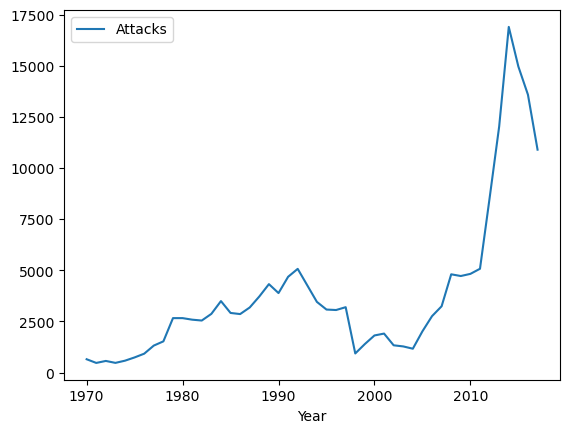

In [13]:
#total attacks in each year
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.plot()

observation------------------
   
    1. Most number of attacks in 2014
    
    2. Least number of attacks in 1971

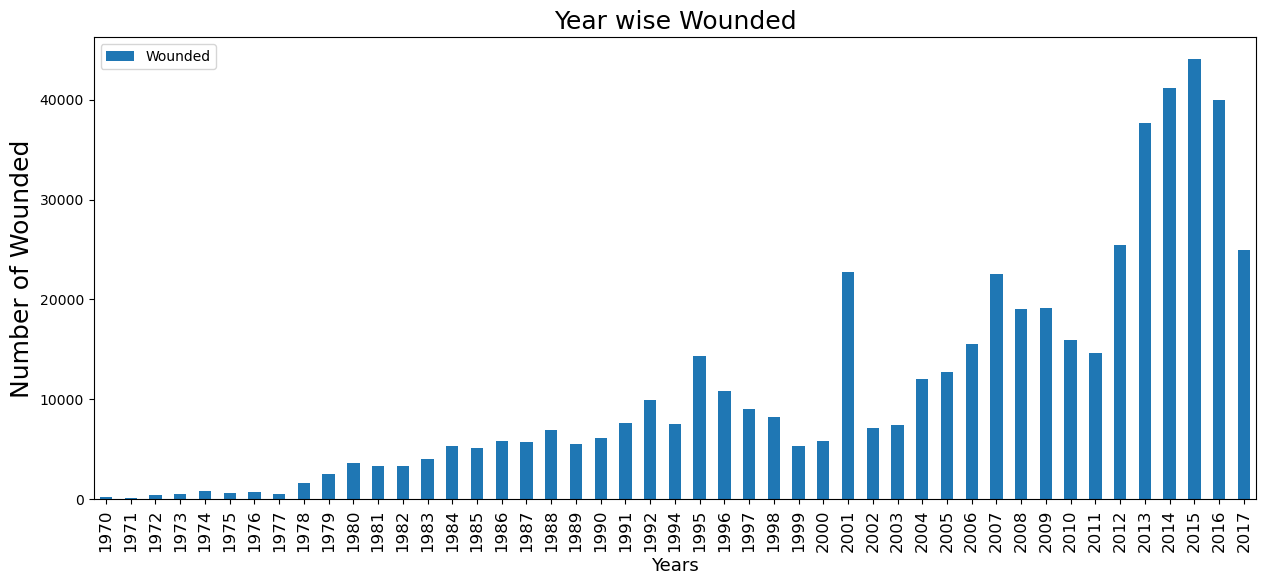

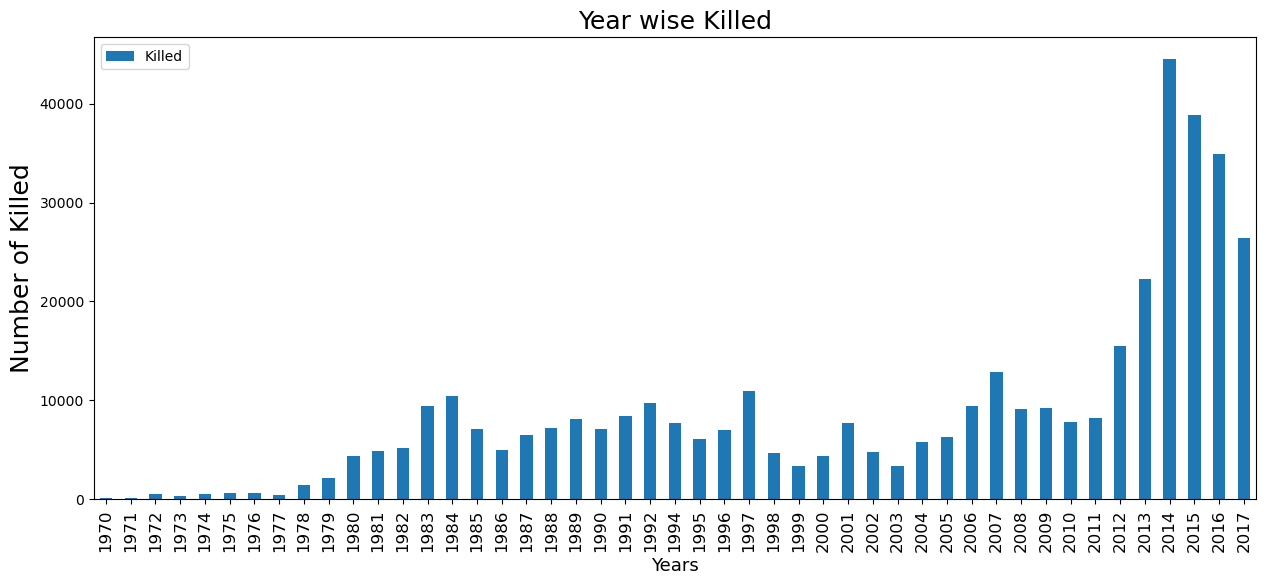

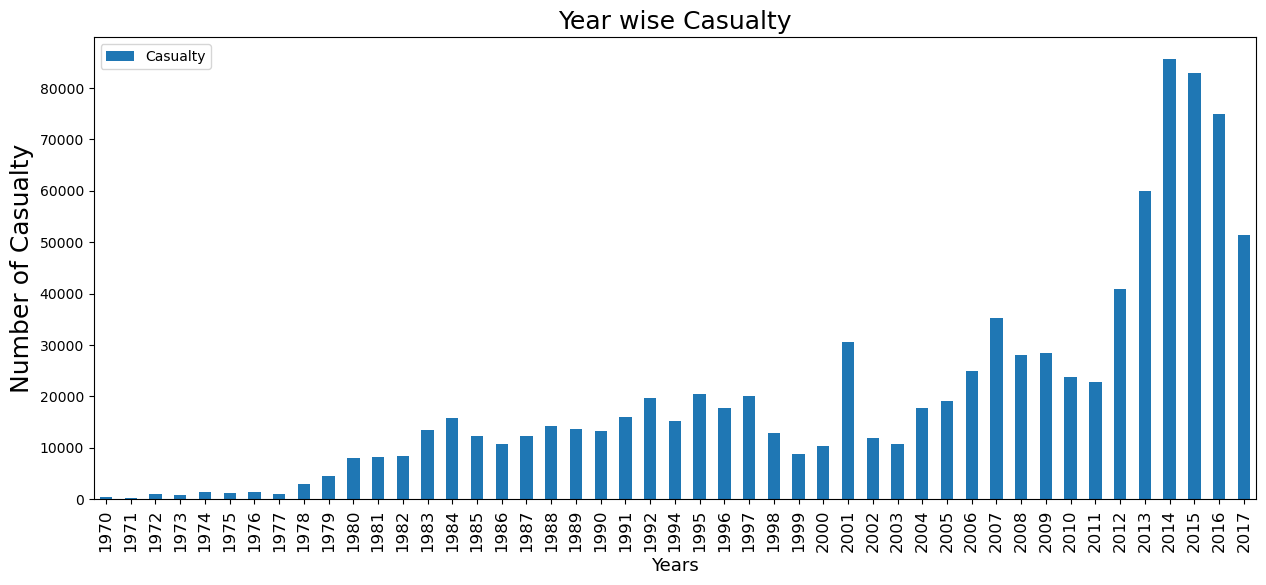

In [14]:
#Let's see total wounded ,Casualty and killed  in each year
col1=['Wounded','Killed','Casualty']
for i in col1:
    yc=df[["Year",i]].groupby("Year").sum()
    yc.plot(kind="bar",figsize=(15,6))
    plt.title(f"Year wise {i}",fontsize=18)
    plt.xlabel("Years",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()
    

### b).Region wise Killed,Wounded,Attacks and Casualties

In [46]:
#no. of attacks in each country
rtt=df["Region"].value_counts().head(10)
rtt

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

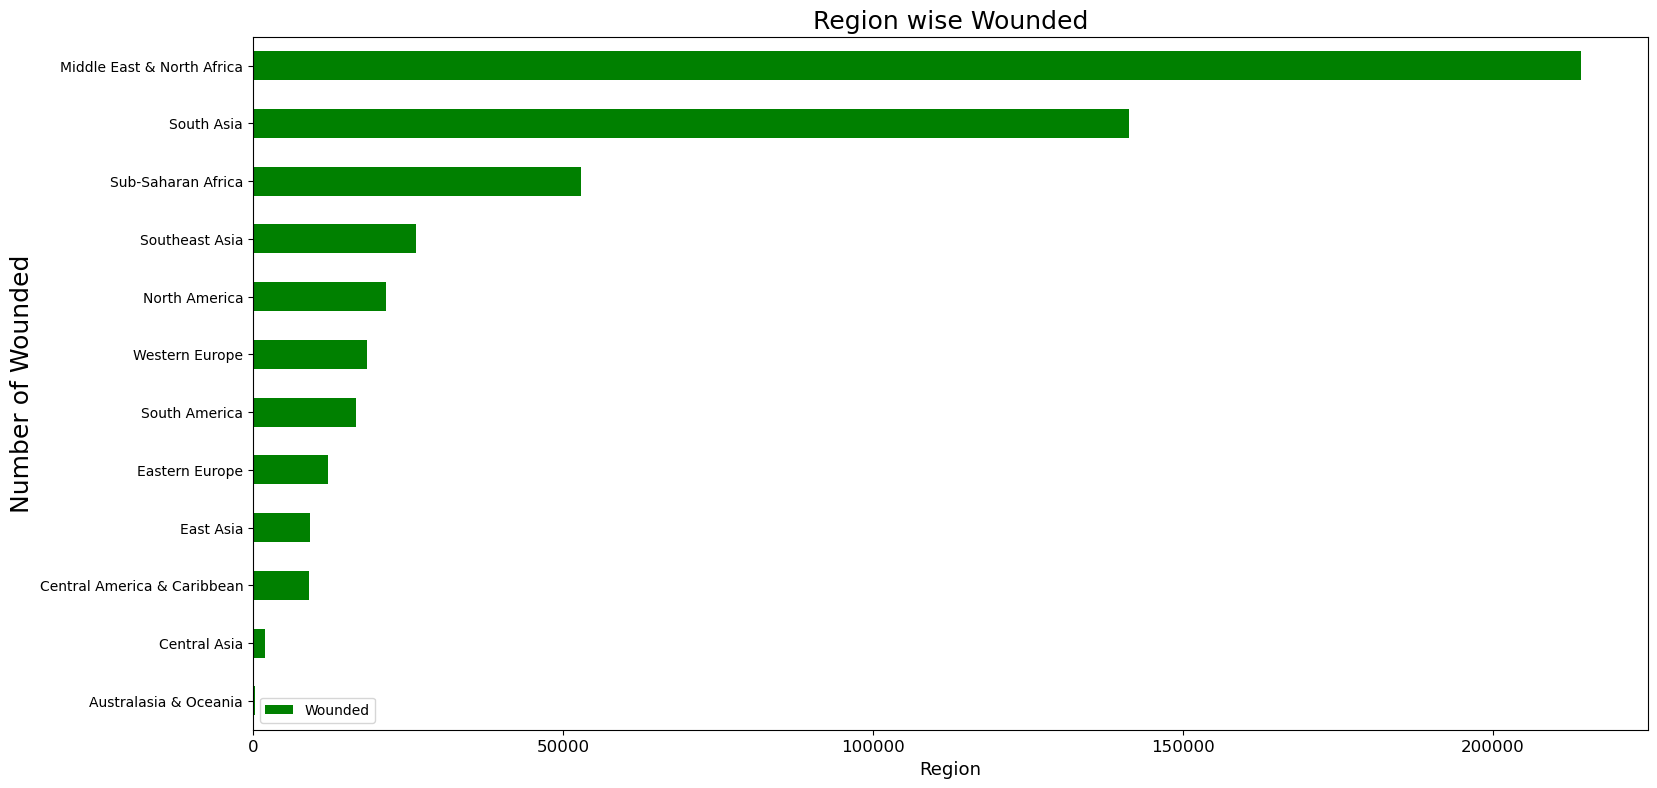

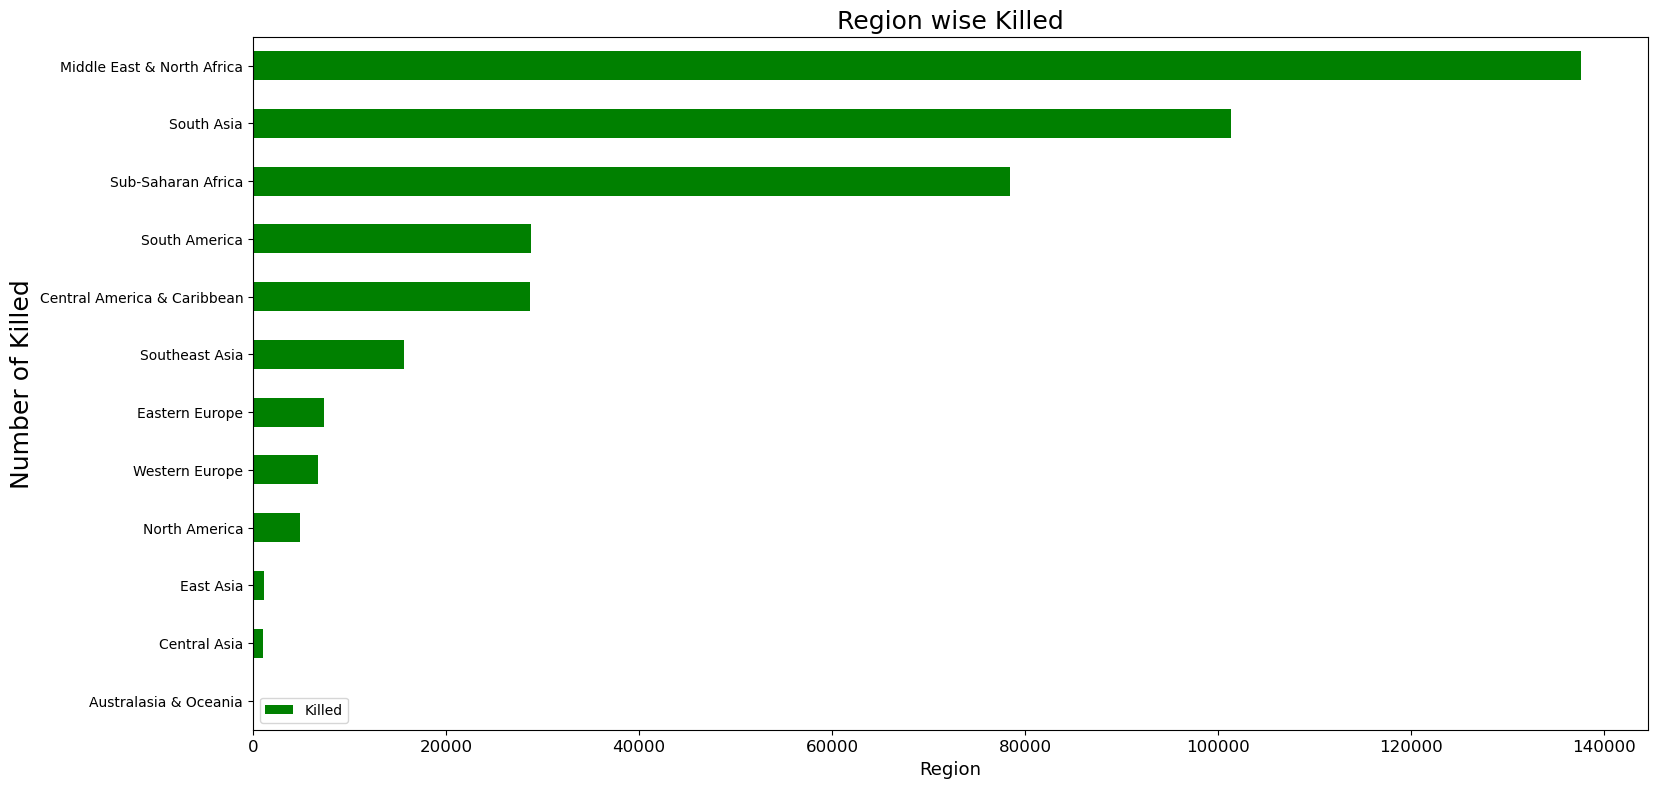

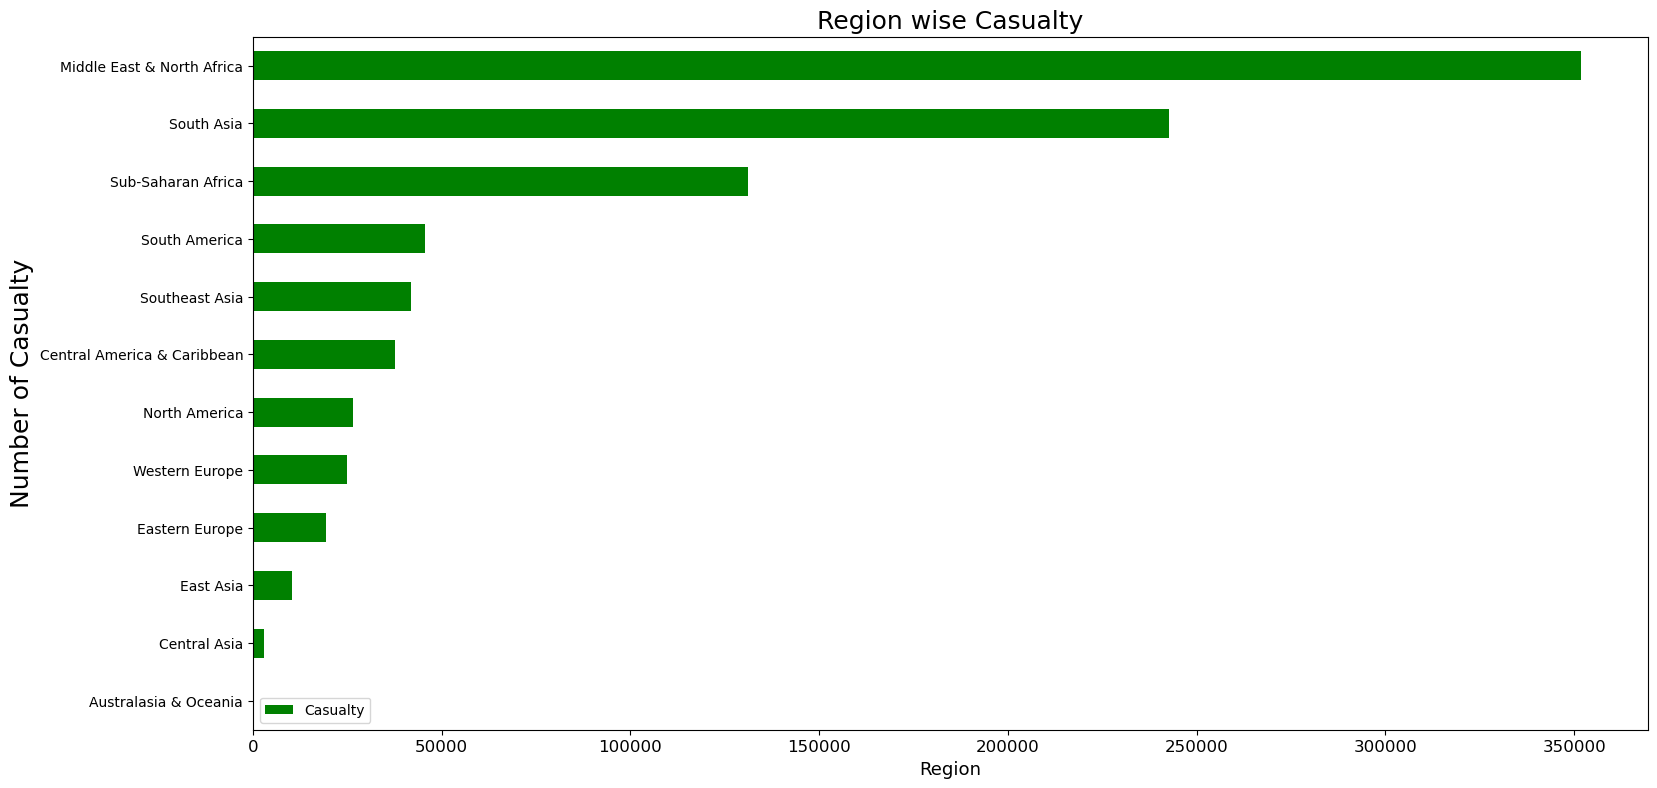

In [15]:
#Region wise killed,wounded and casualty
for i in col1: 
    rc=df[["Region",i]].groupby("Region").sum().sort_values(by=i,ascending=True)
    rc.plot(kind="barh",color="green",figsize=(18,9))
    plt.title(f"Region wise {i}",fontsize=18)
    plt.xlabel("Region",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()

### c).Country wise Killed,Wounded,Attacks and Casualties

In [16]:
#no. of attacks in each country
ctt=df["Country"].value_counts().head(10)
ctt

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

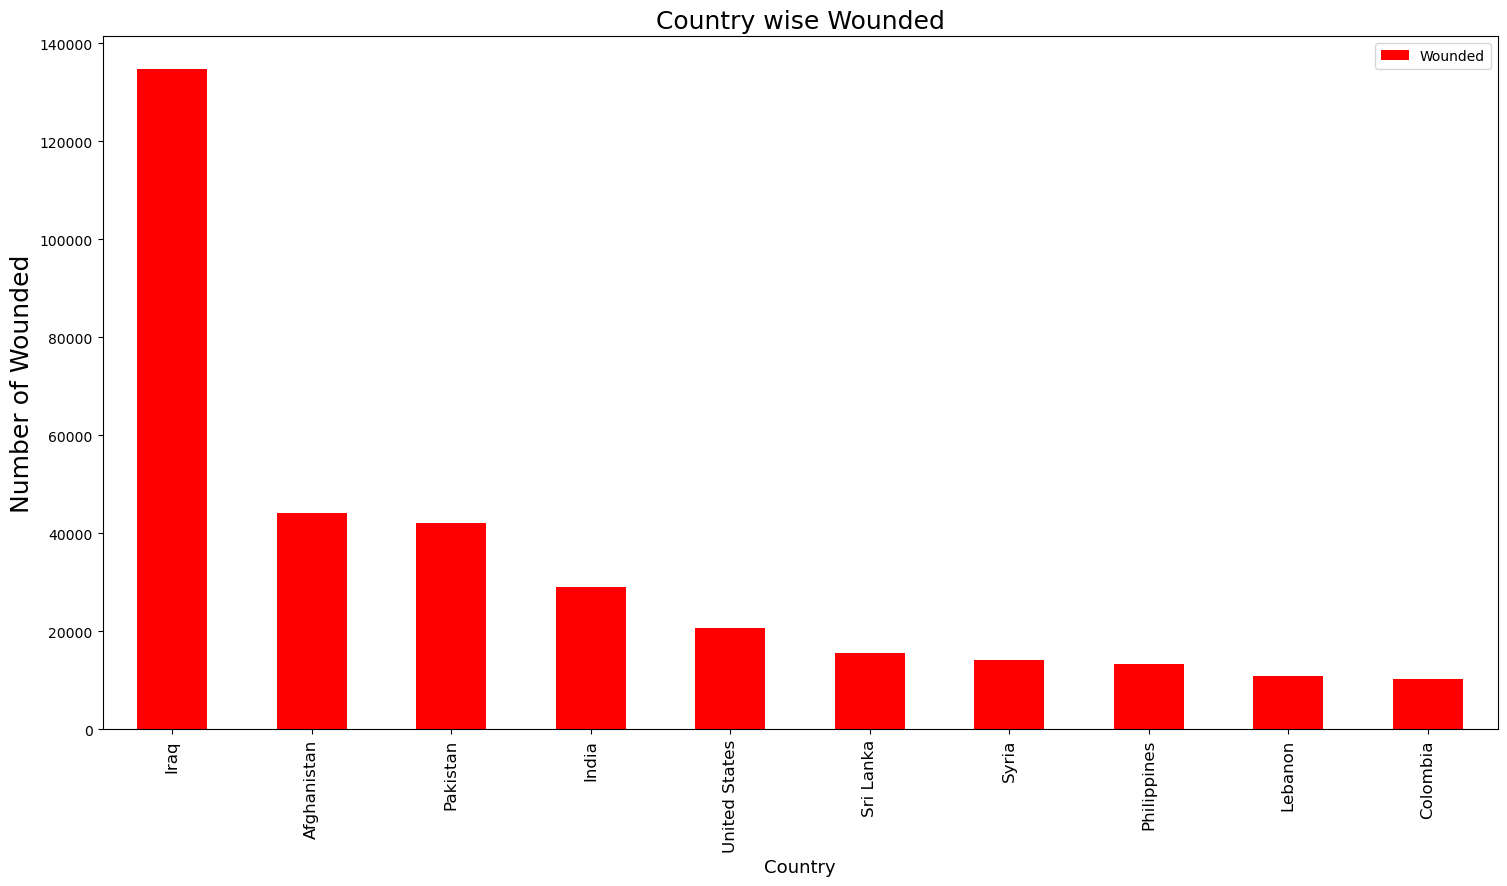

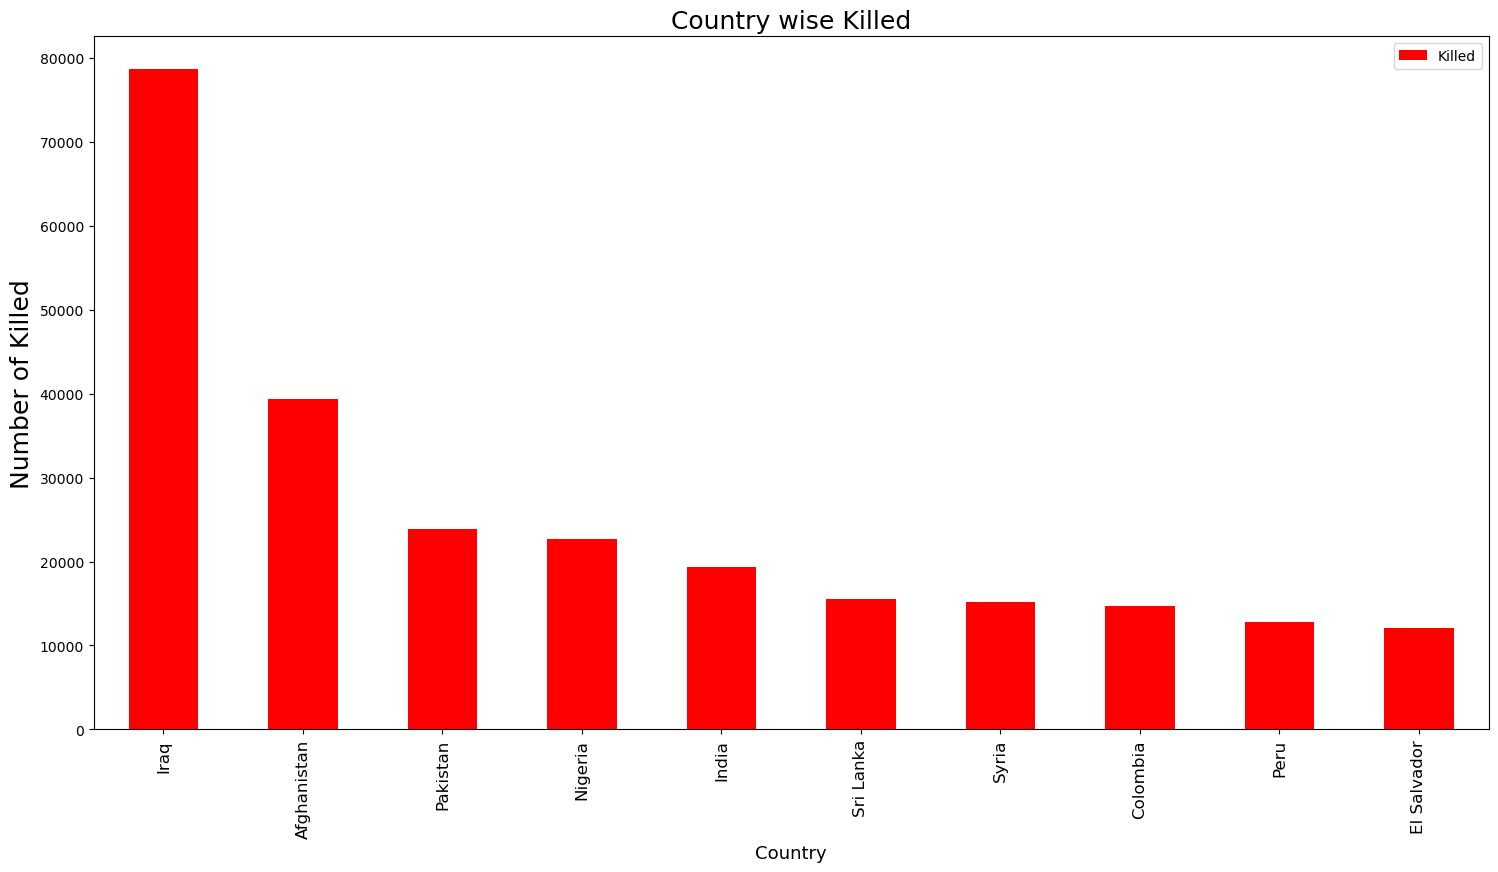

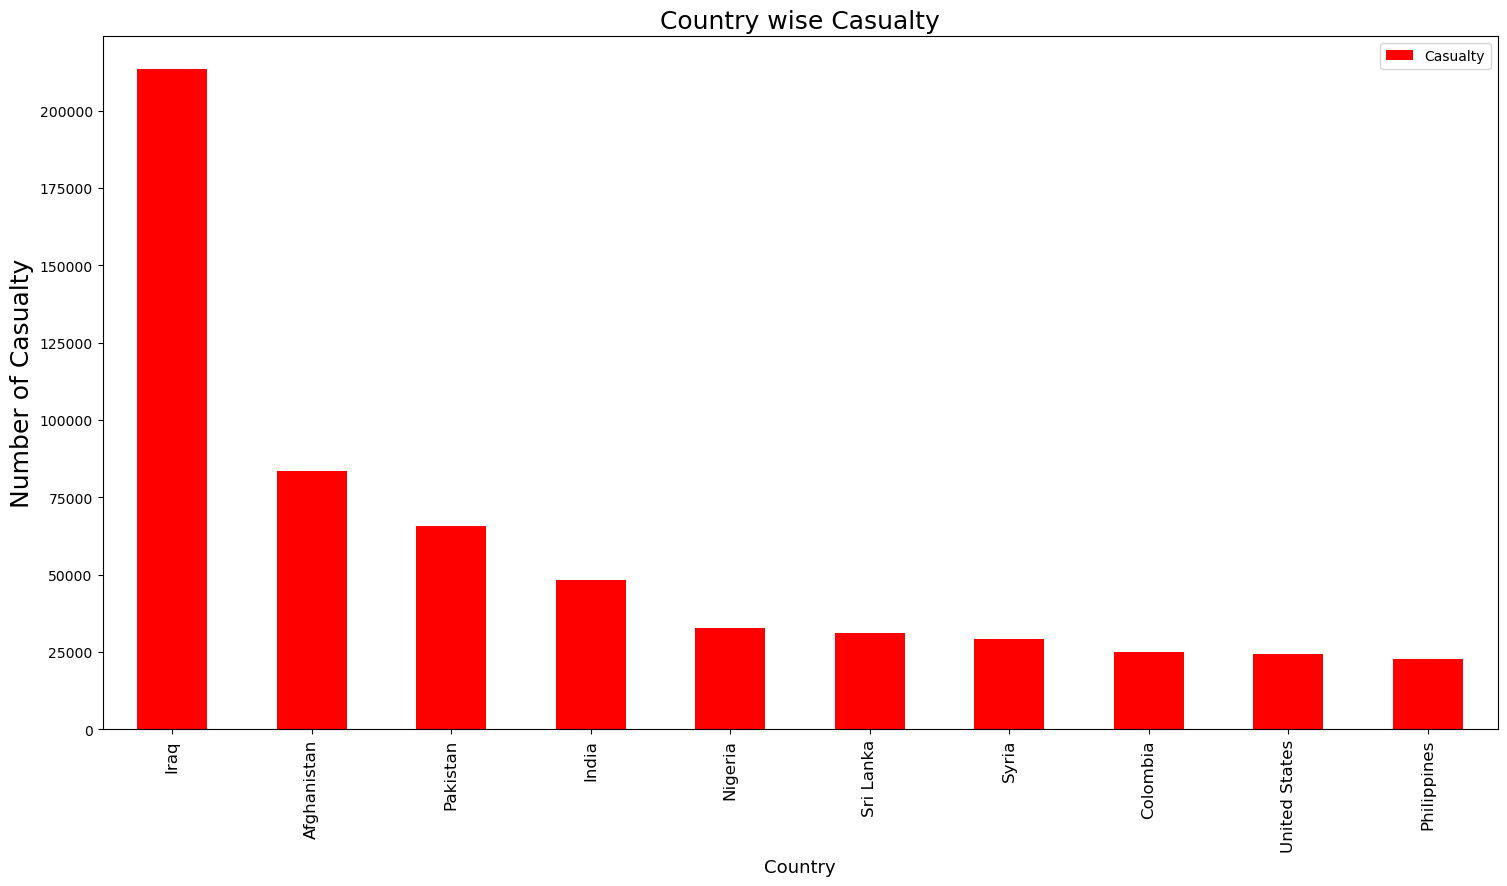

In [18]:
#Country wise killed,wounded and casualty
for i in col1: 
    gc=df[["Country",i]].groupby("Country").sum().sort_values(by=i,ascending=False)[:10]
    gc.plot(kind="bar",color="red",figsize=(18,9))
    plt.title(f"Country wise {i}",fontsize=18)
    plt.xlabel("Country",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()

### d).City wise Killed,Wounded,Attacks and Casualties

In [48]:
#no. of attacks in each country
cet=df["City"].value_counts().head(10)
cet

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

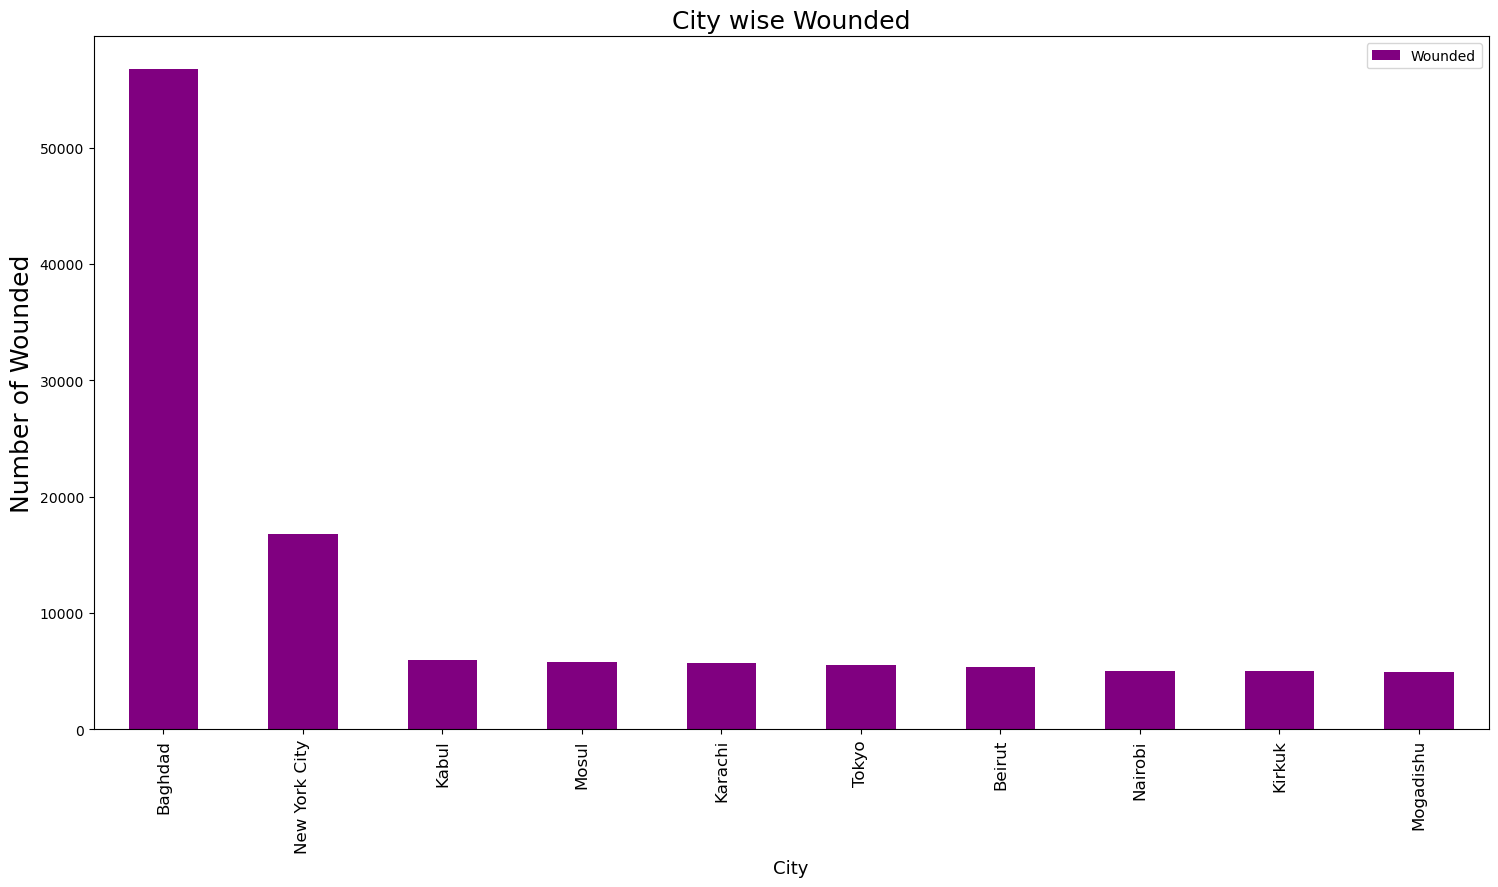

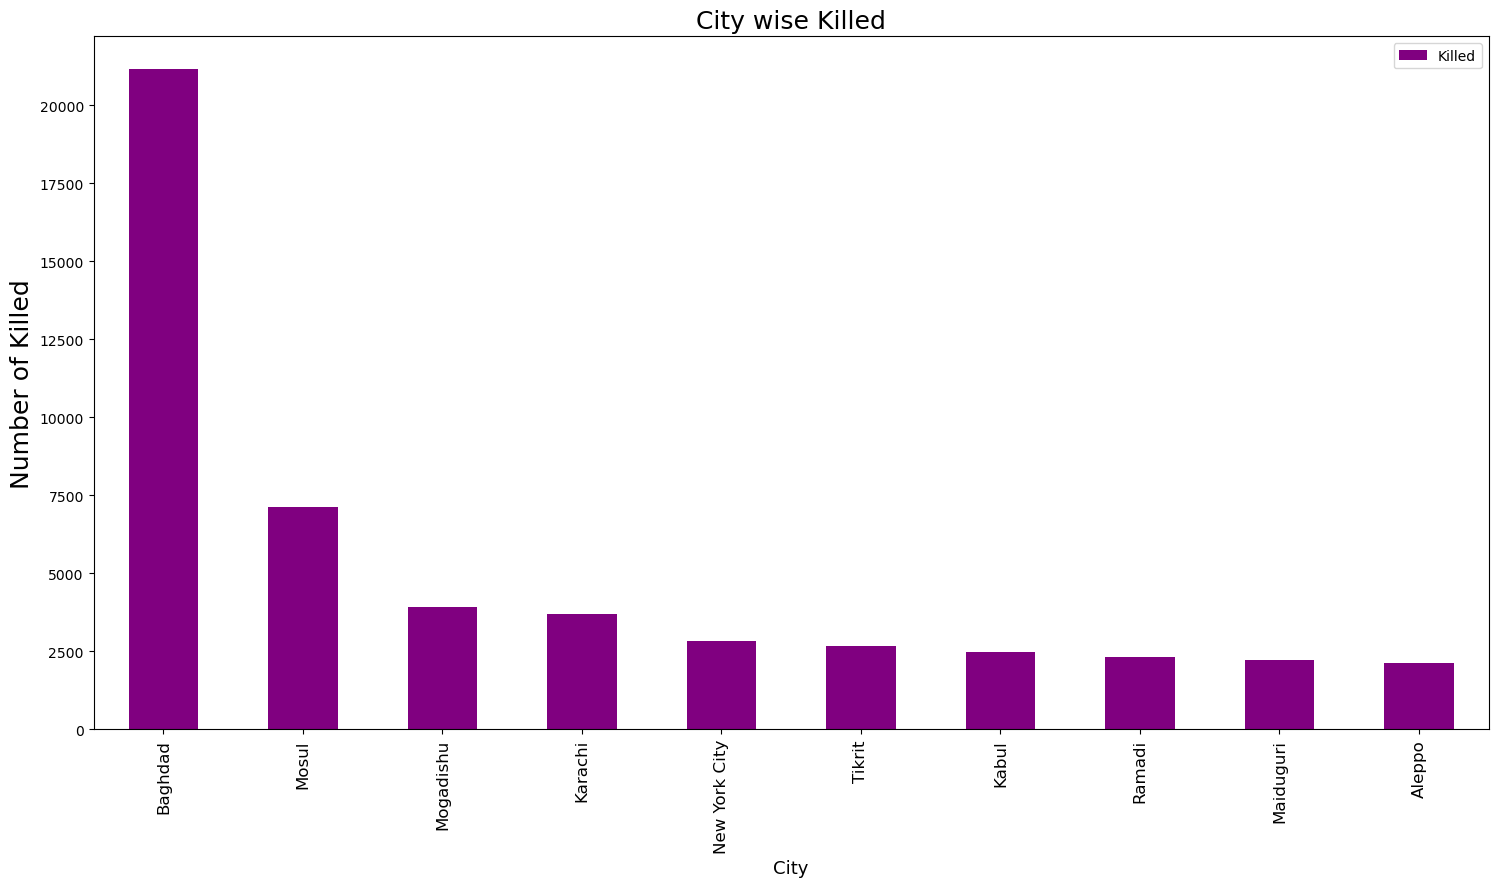

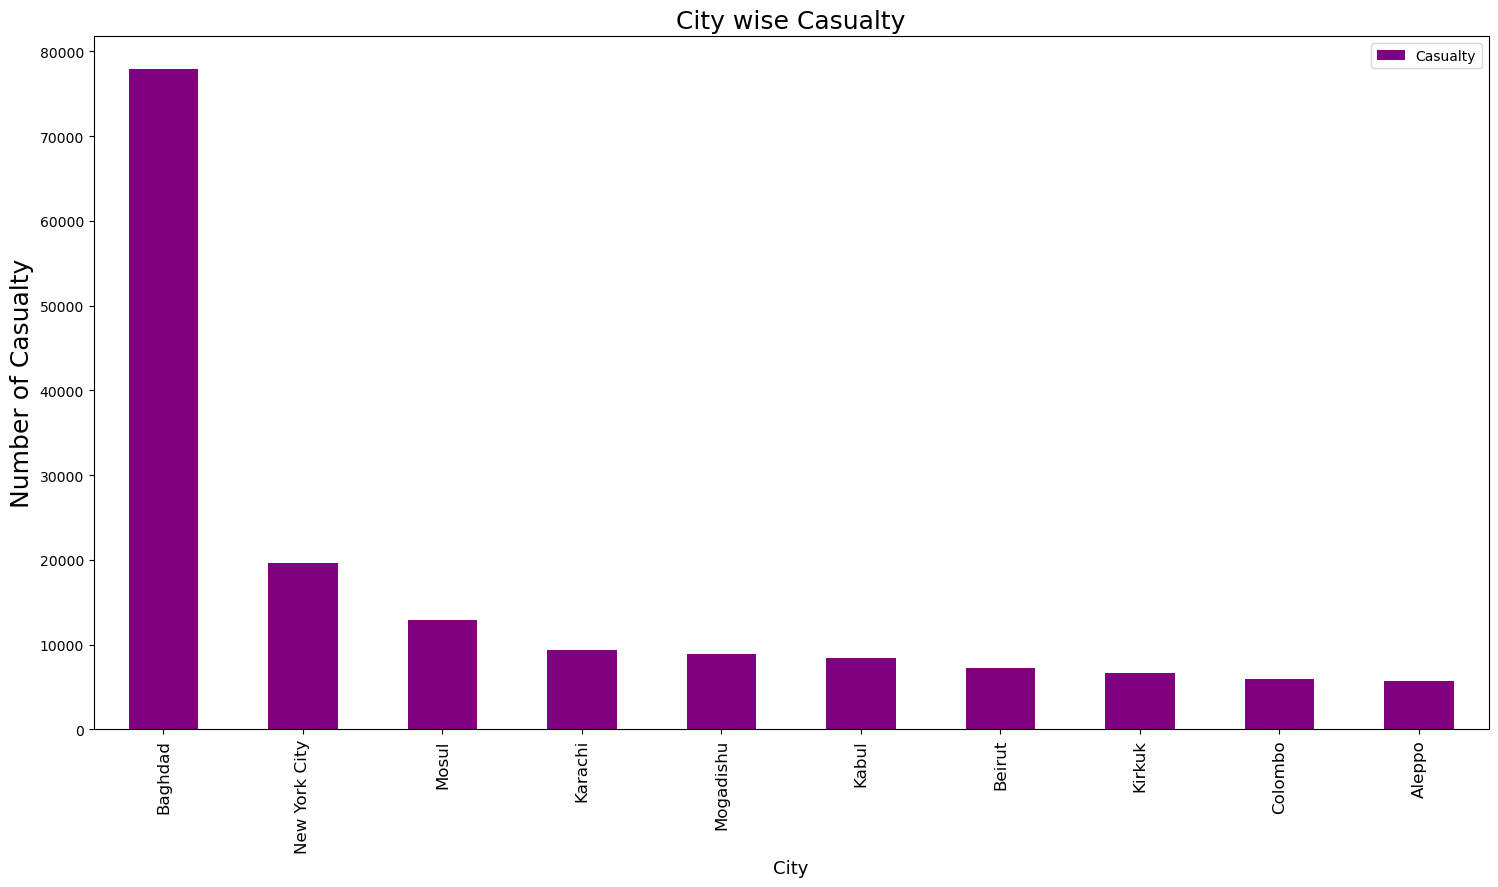

In [19]:
#City wise killed,wounded and casualty
for i in col1: 
    cc=df[["City",i]].groupby("City").sum().sort_values(by=i,ascending=False).drop("Unknown")[:10]
    cc.plot(kind="bar",color="purple",figsize=(18,9))
    plt.title(f"City wise {i}",fontsize=18)
    plt.xlabel("City",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()

### e).Terrorist Group wise Attacks Killed,Wounded,Attacks and Casualties

In [20]:
#Number of Attacks by each Group
grp=df["Group Name"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group Name, dtype: int64

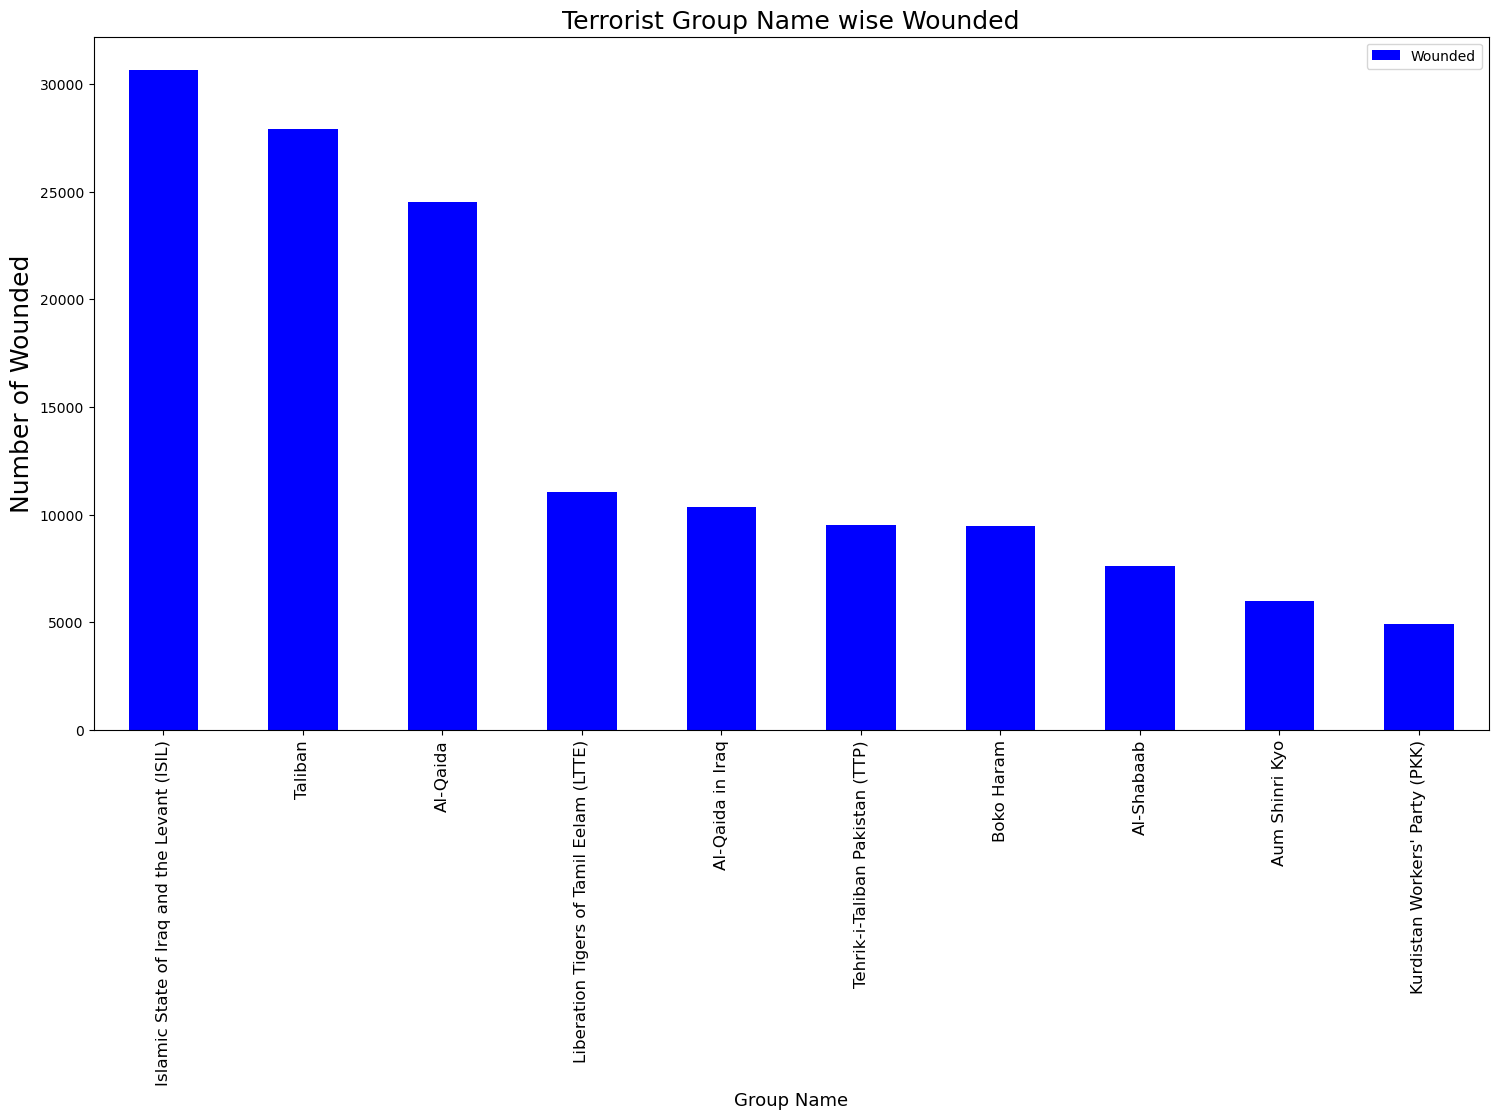

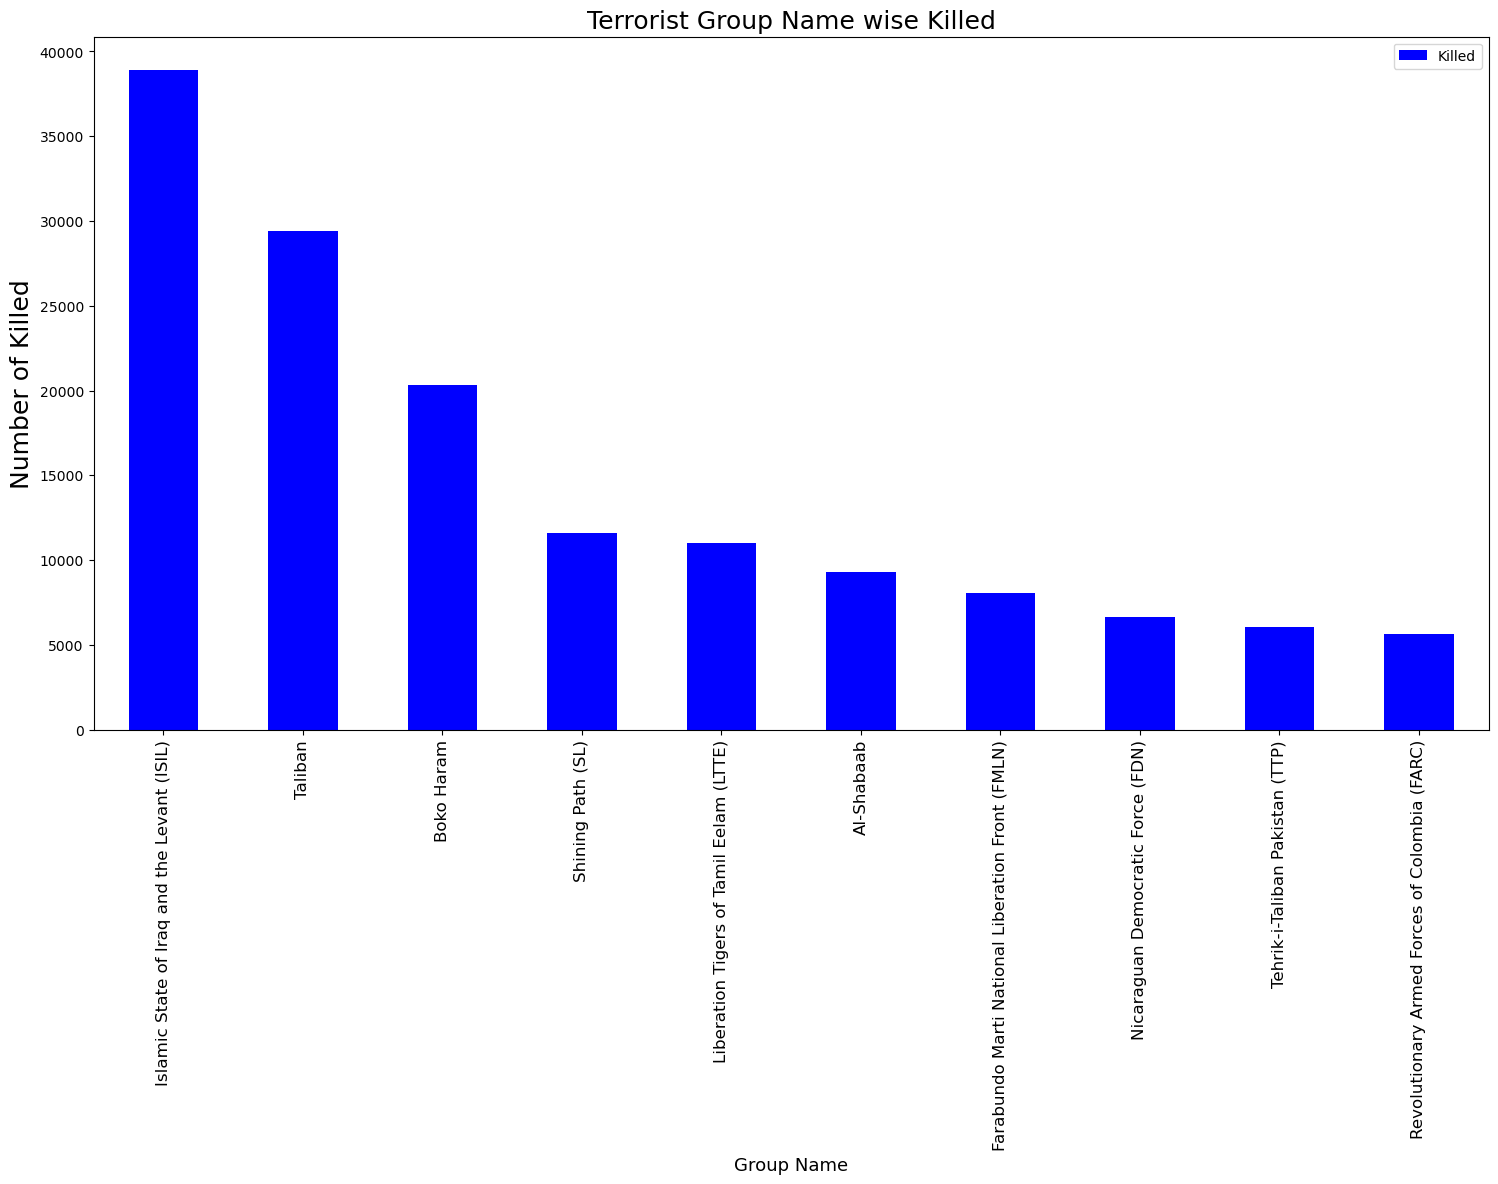

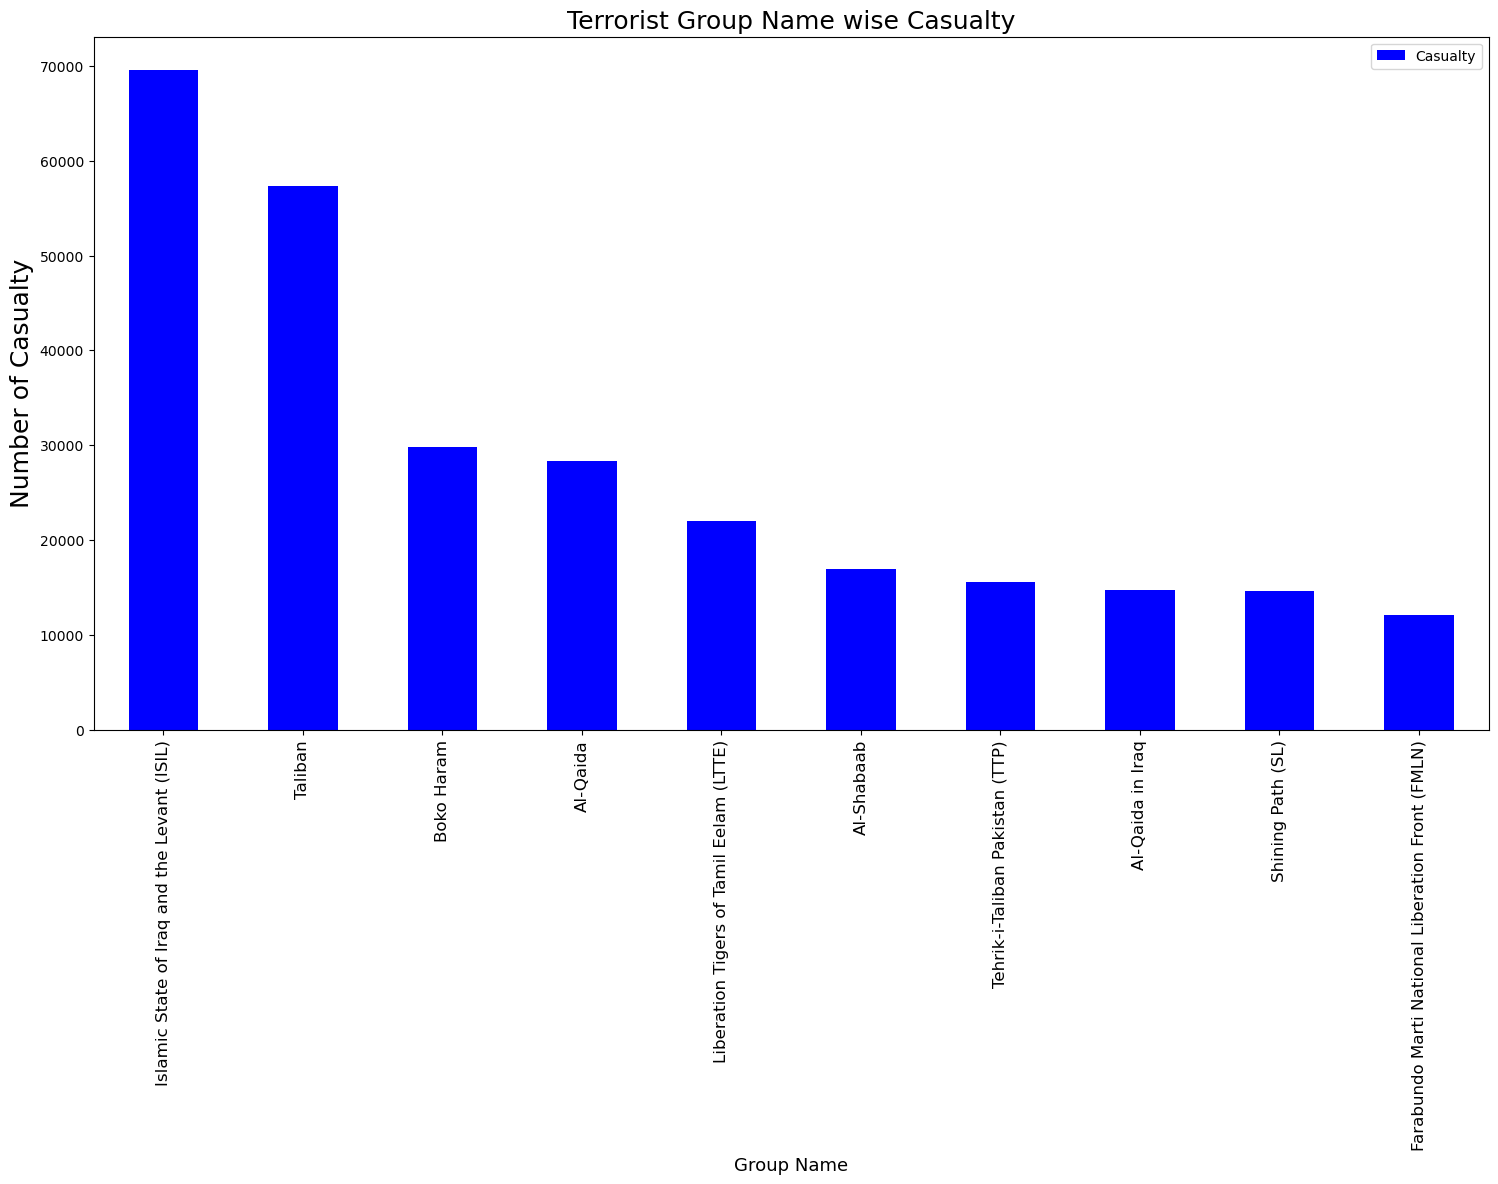

In [22]:
#Group name wise killed,wounded and casualty
for i in col1: 
    cc=df[["Group Name",i]].groupby("Group Name").sum().sort_values(by=i,ascending=False).drop("Unknown")[:10]
    cc.plot(kind="bar",color="blue",figsize=(18,9))
    plt.title(f"Terrorist Group Name wise {i}",fontsize=18)
    plt.xlabel("Group Name",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()

### f).Attack Type wise  Killed,Wounded,Attacks and Casualties

In [23]:
at=df["Attack Type"].value_counts()
at

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

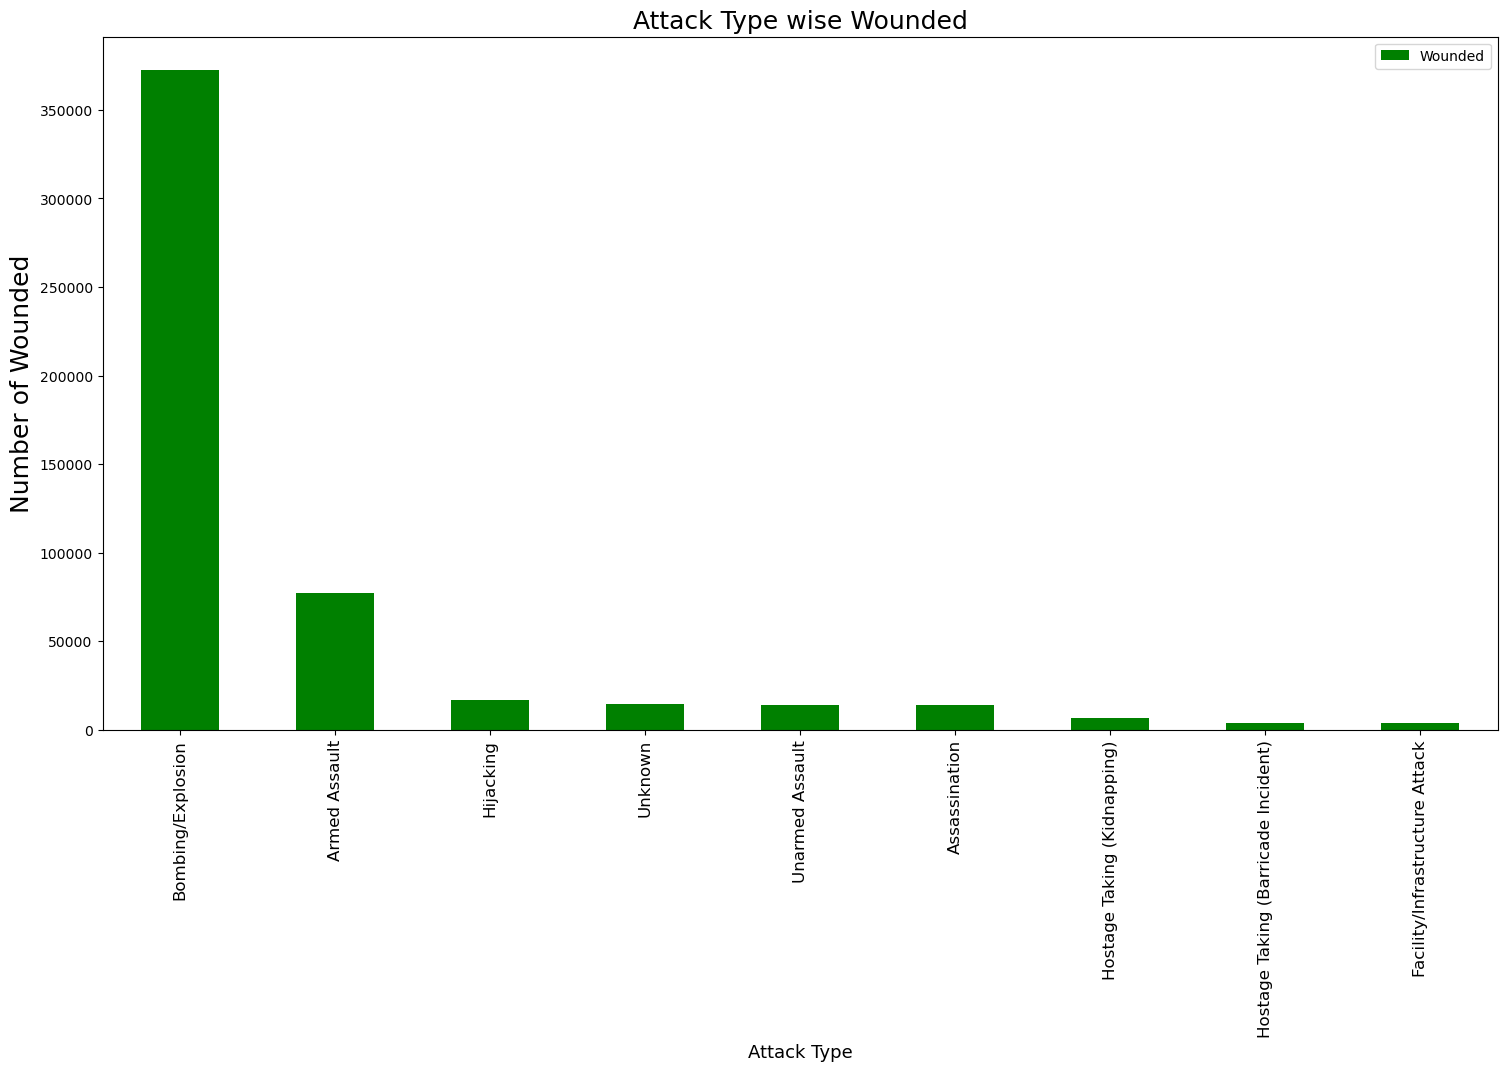

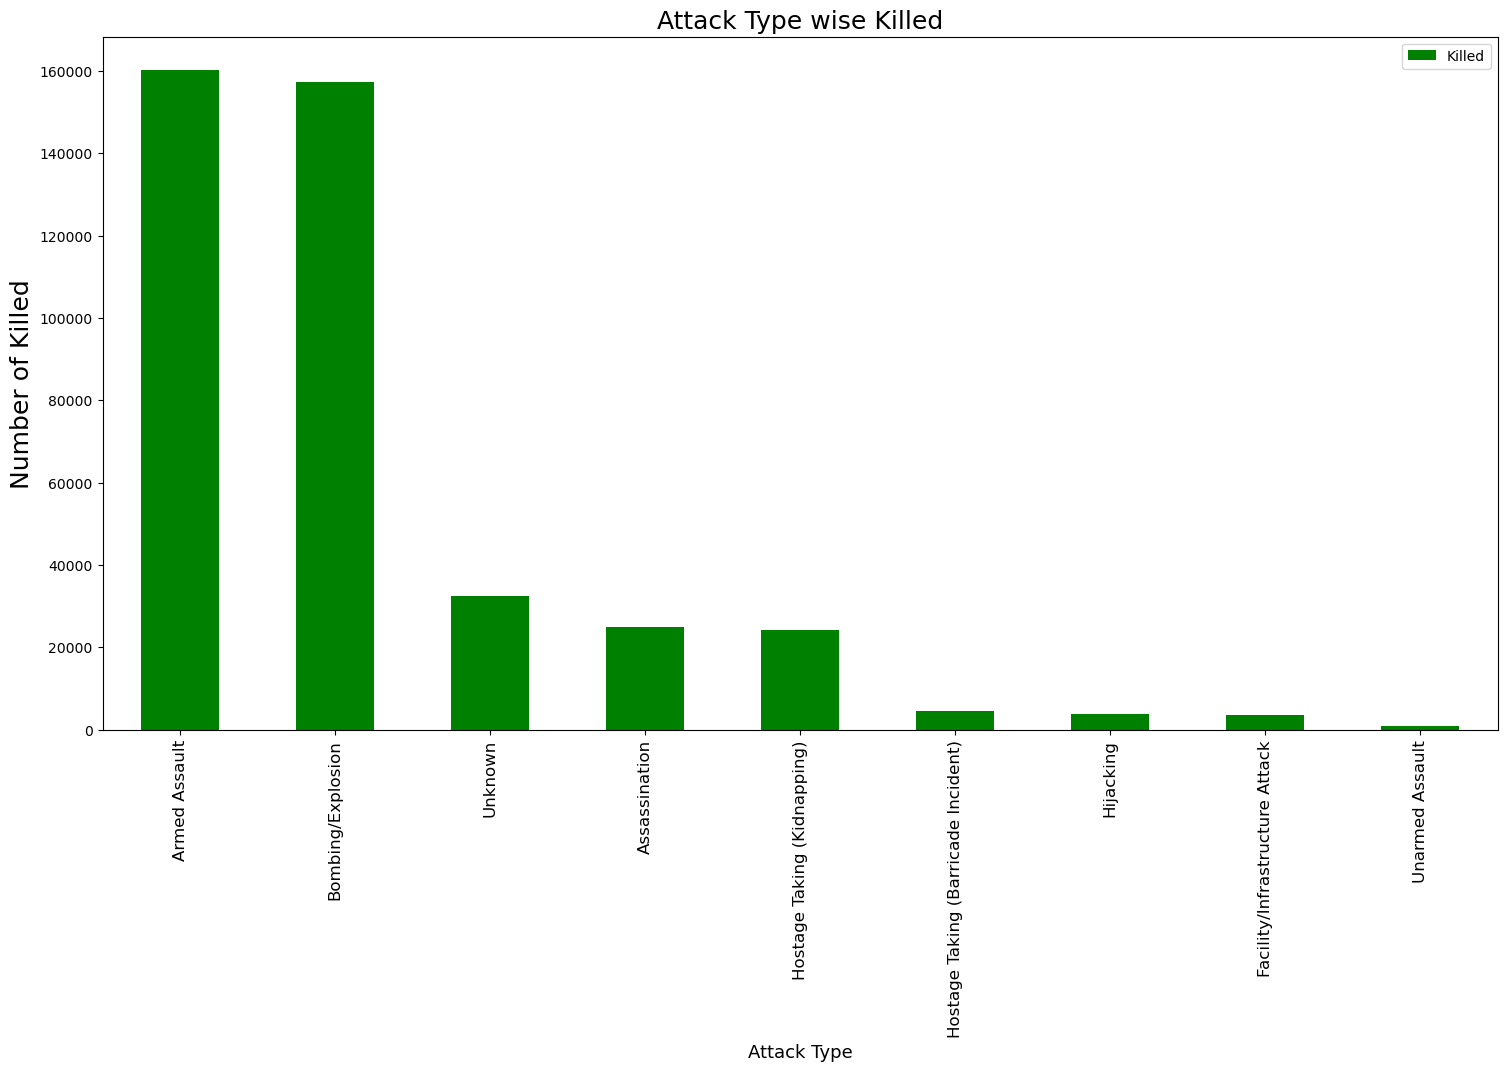

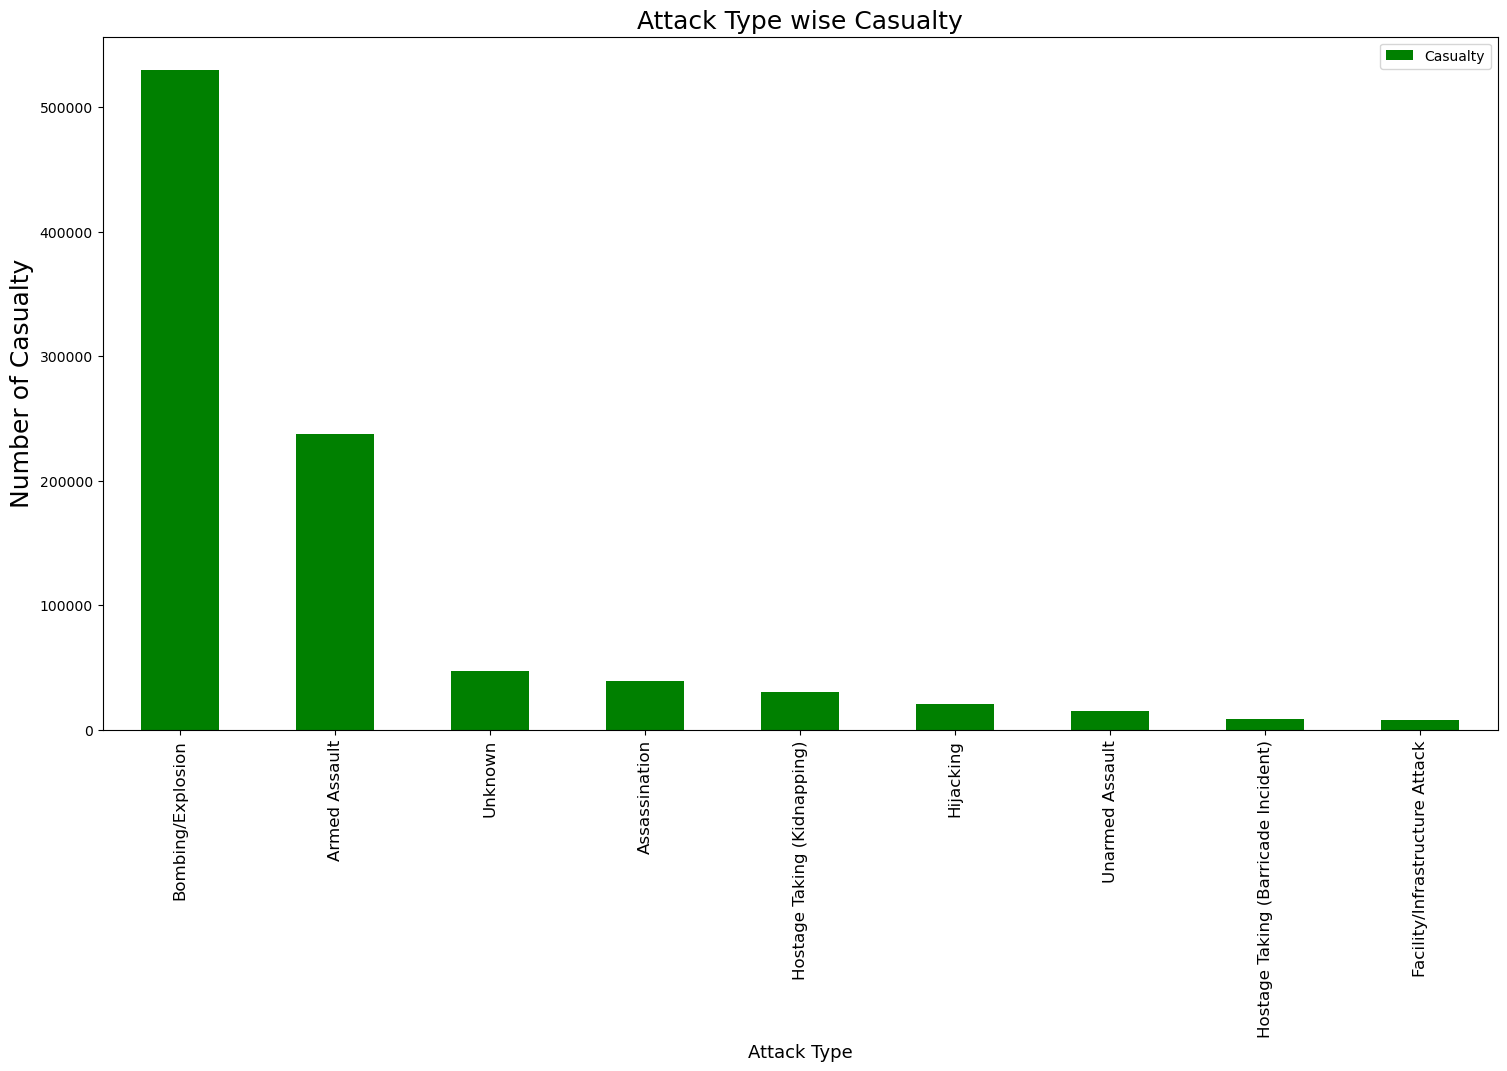

In [25]:
#Attack type wise killed,wounded and casualty
for i in col1: 
    att=df[["Attack Type",i]].groupby("Attack Type").sum().sort_values(by=i,ascending=False)
    att.plot(kind="bar",color="green",figsize=(18,9))
    plt.title(f"Attack Type wise {i}",fontsize=18)
    plt.xlabel("Attack Type",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()

### g).Target Type wise Killed,Wounded,Attacks and Casualties

In [26]:
ta=df["Target Type"].value_counts()
ta

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target Type, dtype: int64

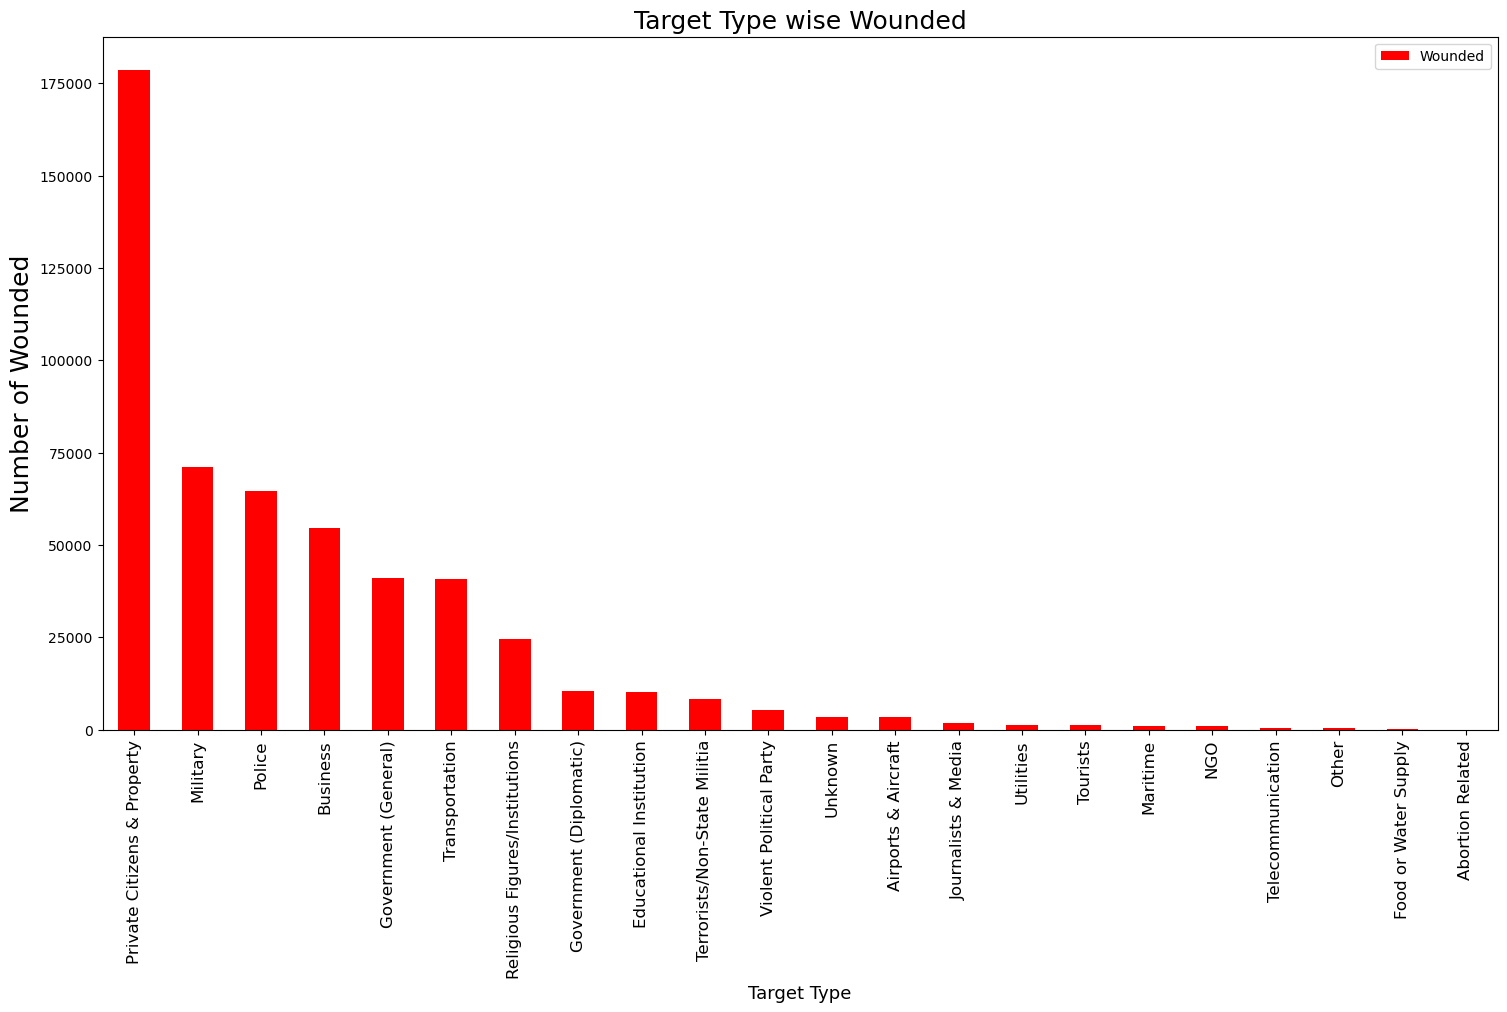

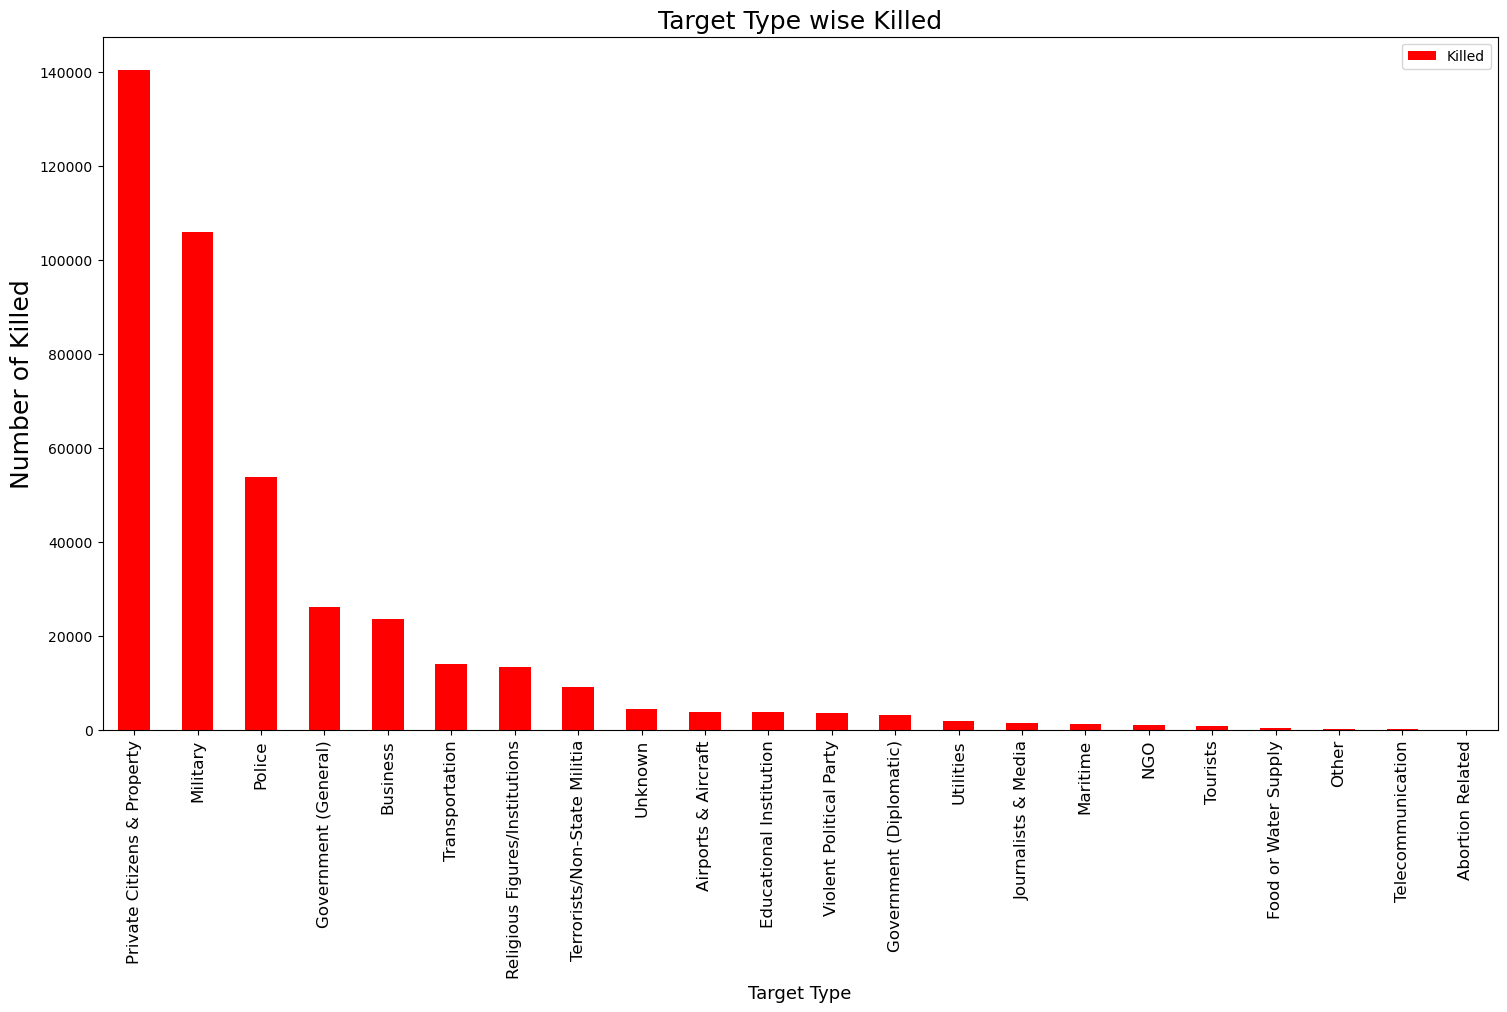

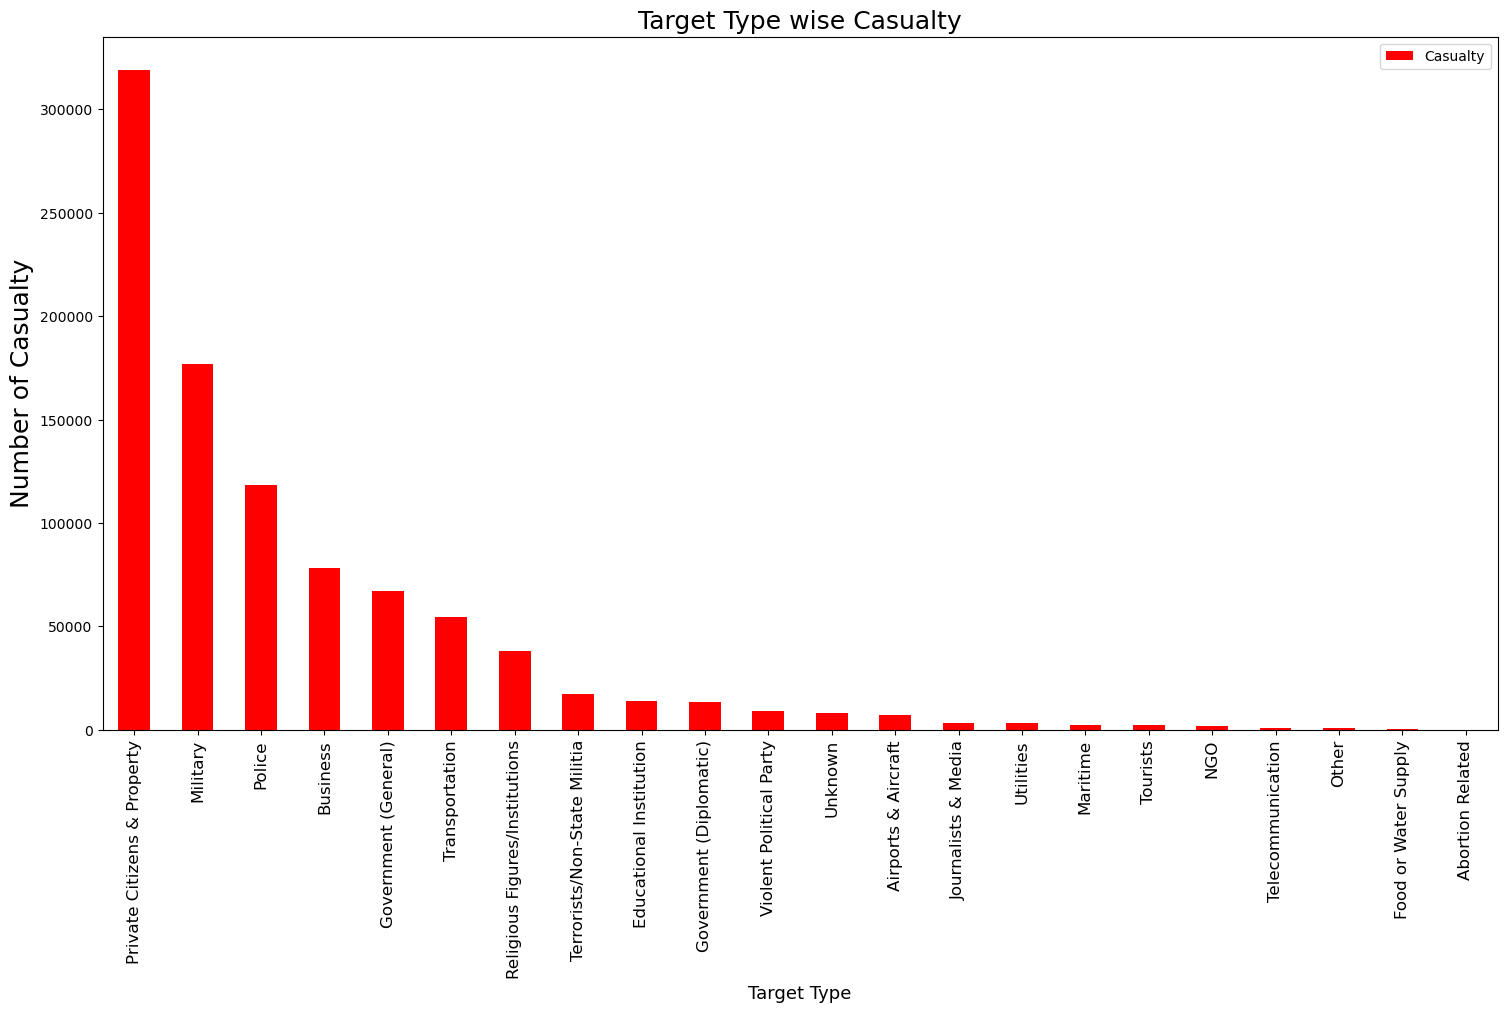

In [28]:
#Target wise killed,wounded and casualty
for i in col1: 
    ttt=df[["Target Type",i]].groupby("Target Type").sum().sort_values(by=i,ascending=False)
    ttt.plot(kind="bar",color="red",figsize=(18,9))
    plt.title(f"Target Type wise {i}",fontsize=18)
    plt.xlabel("Target Type",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()

### h).Group Name wise Killed,Wounded,Attacks and Casualties

In [29]:
#total group names in each country
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

C:\Users\91639\AppData\Local\Temp\ipykernel_27072\390661980.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca=df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

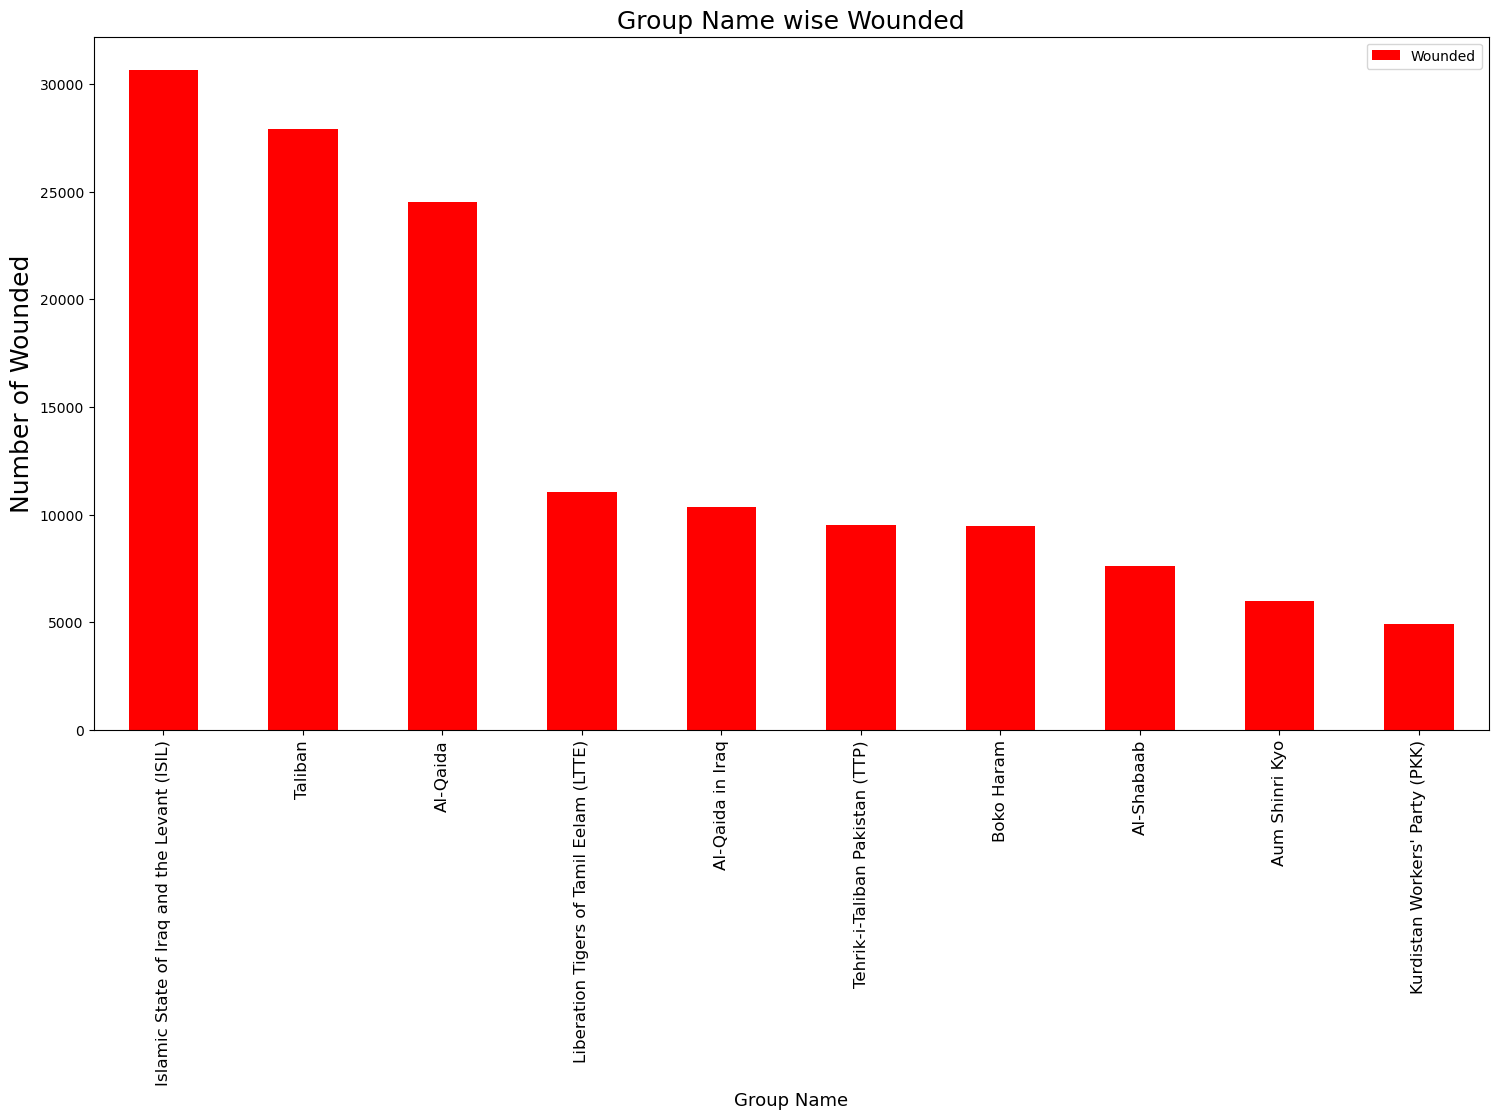

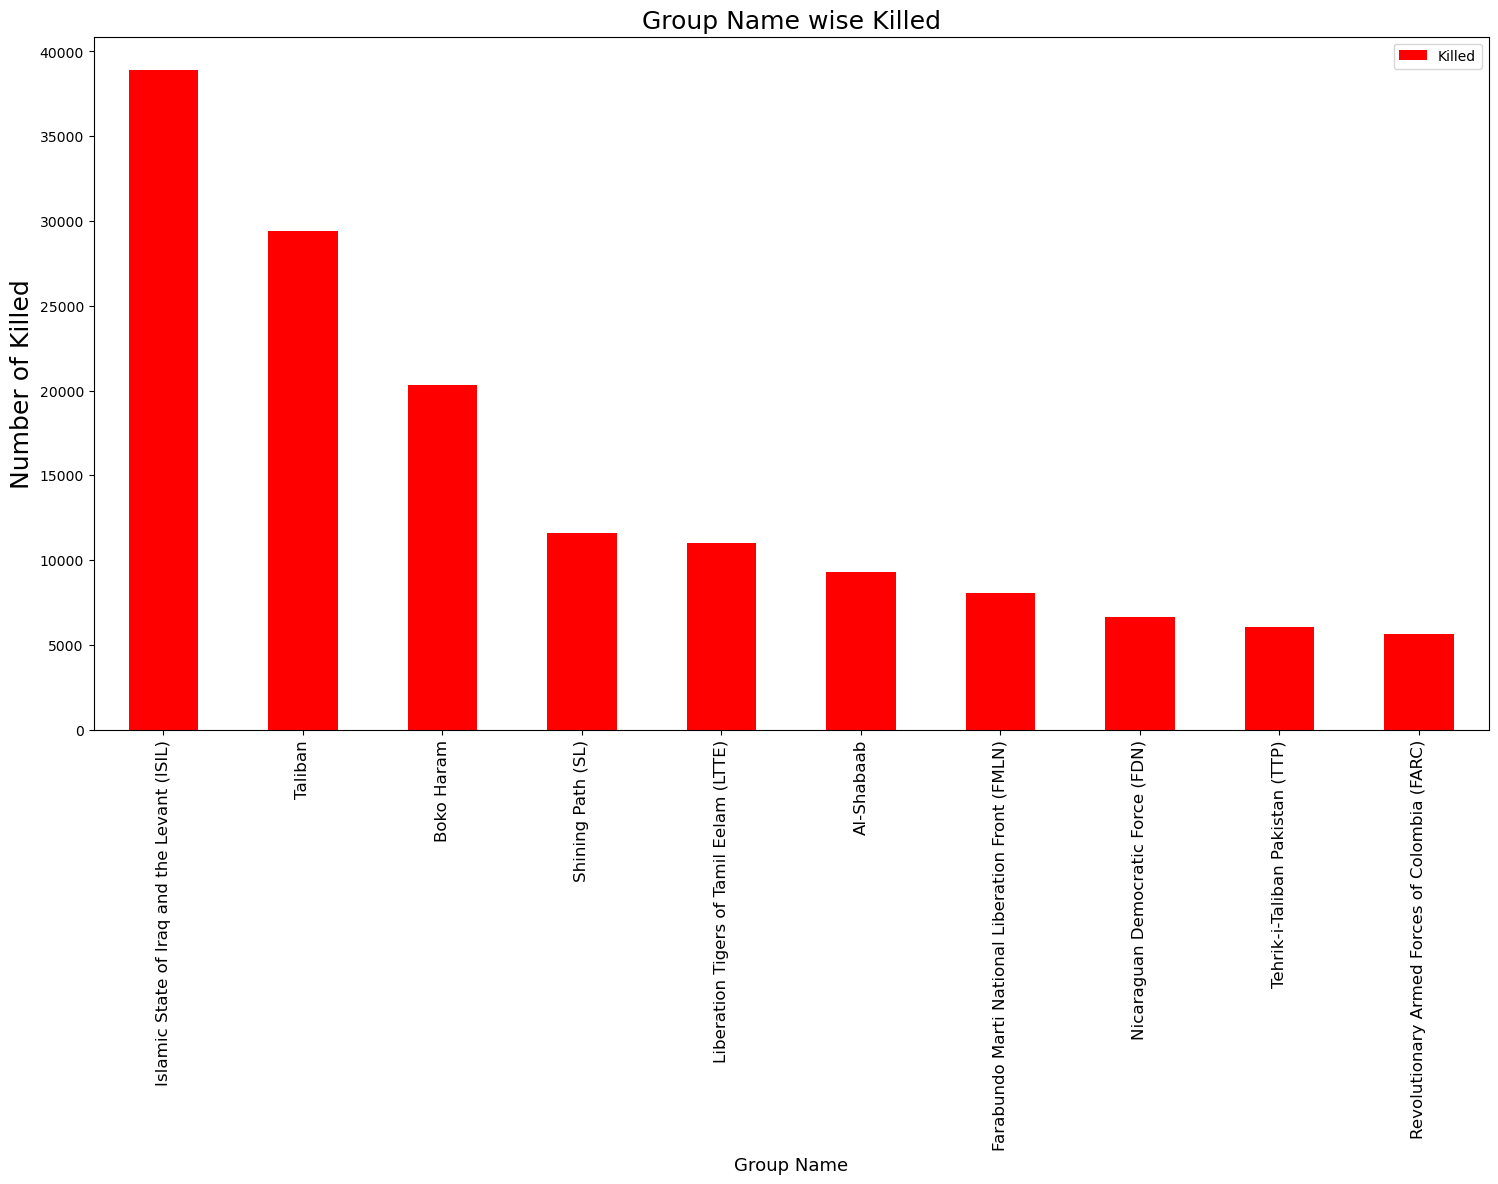

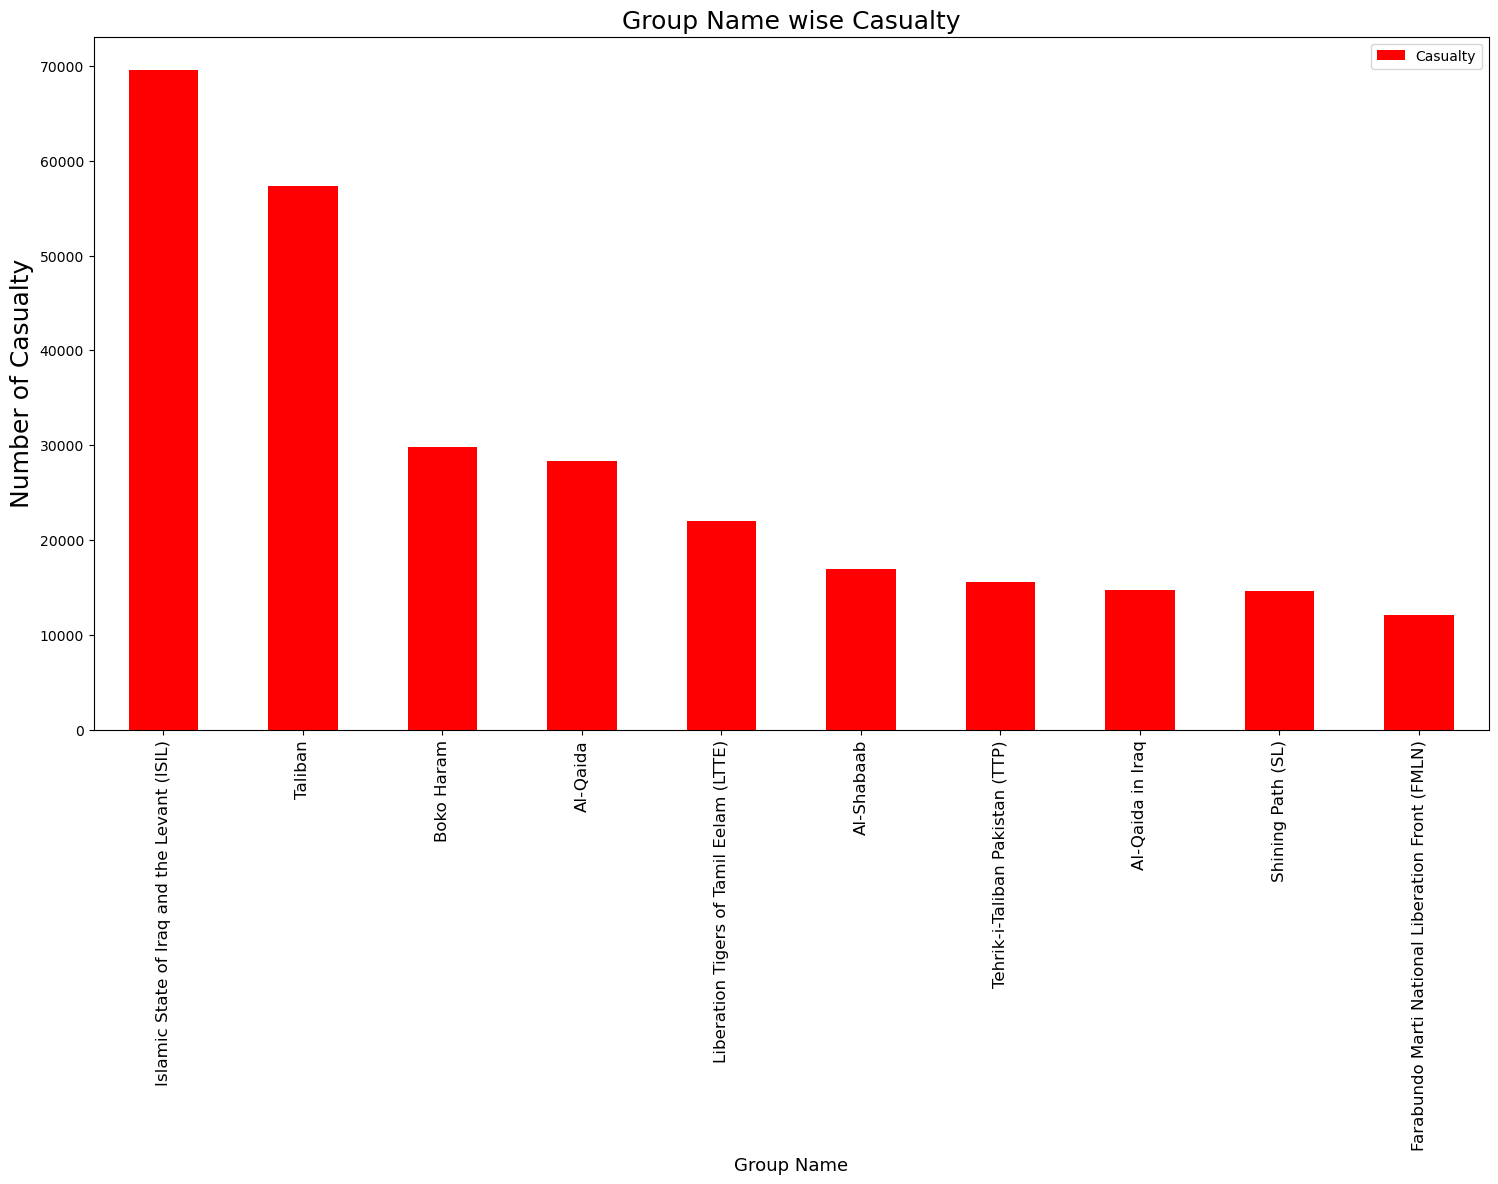

In [40]:
#group name wise wounded,killed and casualty
for i in col1: 
    ttt=df[["Group Name",i]].groupby("Group Name").sum().sort_values(by=i,ascending=False).drop("Unknown")
    ttt[:10].plot(kind="bar",color="red",figsize=(18,9))
    plt.title(f"Group Name wise {i}",fontsize=18)
    plt.xlabel("Group Name",fontsize=13)
    plt.xticks(fontsize=12)
    plt.ylabel(f"Number of {i}",fontsize=18)
    plt.show()

C:\Users\91639\AppData\Local\Temp\ipykernel_27072\2003630183.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcd=df[["Group Name","Country",i]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by=i,ascending=False).drop("Unknown").head(10)


                                                           Wounded
Group Name                                  Country               
Taliban                                     Afghanistan    27871.0
Islamic State of Iraq and the Levant (ISIL) Iraq           23697.0
Al-Qaida                                    United States  16493.0
Liberation Tigers of Tamil Eelam (LTTE)     Sri Lanka      10991.0
Al-Qaida in Iraq                            Iraq           10075.0
Tehrik-i-Taliban Pakistan (TTP)             Pakistan        9518.0
Boko Haram                                  Nigeria         7671.0
Al-Shabaab                                  Somalia         6025.0
Aum Shinri Kyo                              Japan           6003.0
Kurdistan Workers' Party (PKK)              Turkey          4795.0
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Group Name and country wrt to  Wounded')


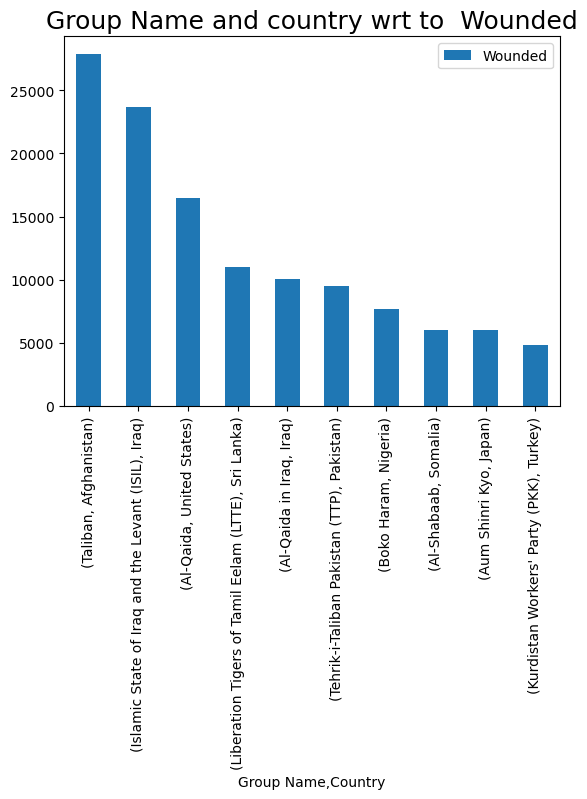

C:\Users\91639\AppData\Local\Temp\ipykernel_27072\2003630183.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcd=df[["Group Name","Country",i]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by=i,ascending=False).drop("Unknown").head(10)


                                                               Killed
Group Name                                       Country             
Islamic State of Iraq and the Levant (ISIL)      Iraq         31058.0
Taliban                                          Afghanistan  29269.0
Boko Haram                                       Nigeria      16917.0
Shining Path (SL)                                Peru         11595.0
Liberation Tigers of Tamil Eelam (LTTE)          Sri Lanka    10928.0
Al-Shabaab                                       Somalia       8176.0
Farabundo Marti National Liberation Front (FMLN) El Salvador   8019.0
Islamic State of Iraq and the Levant (ISIL)      Syria         6883.0
Nicaraguan Democratic Force (FDN)                Nicaragua     6630.0
Tehrik-i-Taliban Pakistan (TTP)                  Pakistan      6014.0
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Group Name and country wrt to  Killed')


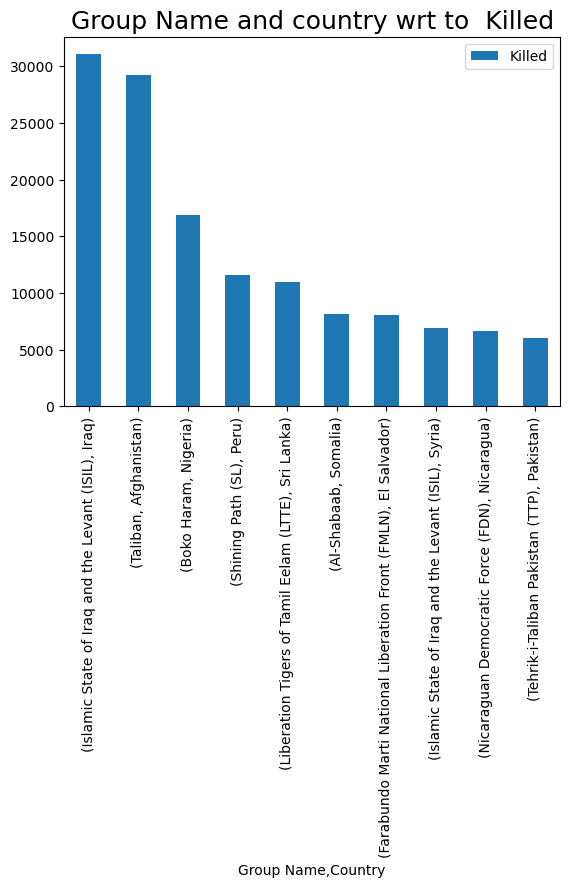

C:\Users\91639\AppData\Local\Temp\ipykernel_27072\2003630183.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcd=df[["Group Name","Country",i]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by=i,ascending=False).drop("Unknown").head(10)


                                                                Casualty
Group Name                                       Country                
Taliban                                          Afghanistan     57140.0
Islamic State of Iraq and the Levant (ISIL)      Iraq            54755.0
Boko Haram                                       Nigeria         24588.0
Liberation Tigers of Tamil Eelam (LTTE)          Sri Lanka       21919.0
Al-Qaida                                         United States   19494.0
Tehrik-i-Taliban Pakistan (TTP)                  Pakistan        15532.0
Shining Path (SL)                                Peru            14625.0
Al-Qaida in Iraq                                 Iraq            14348.0
Al-Shabaab                                       Somalia         14201.0
Farabundo Marti National Liberation Front (FMLN) El Salvador     12068.0
AxesSubplot(0.125,0.11;0.775x0.77)
Text(0.5, 1.0, 'Group Name and country wrt to  Casualty')


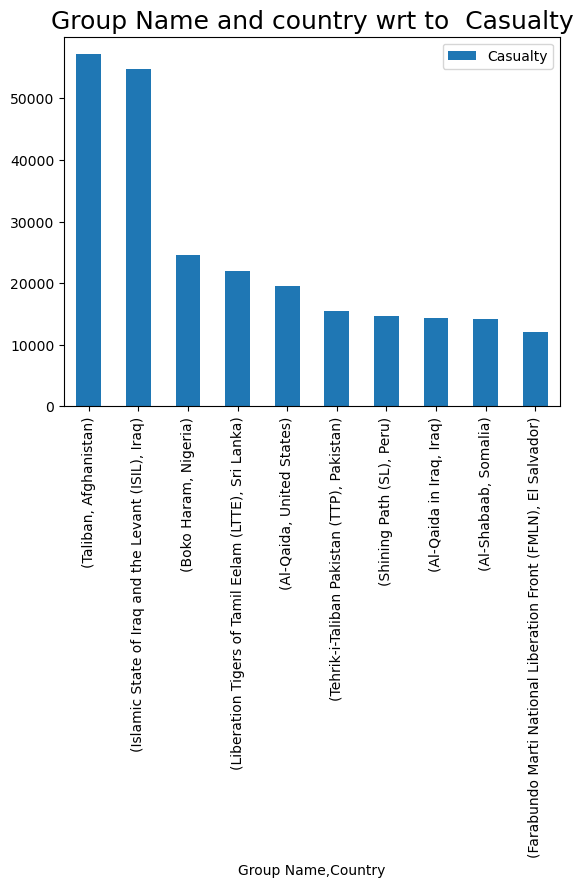

In [45]:
#group name and country wrt to killed,wounded,casualty
for i in col1:
   gcd=df[["Group Name","Country",i]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by=i,ascending=False).drop("Unknown").head(10)
   print(gcd)
   print(gcd.plot(kind="bar"))  
   print(plt.title(f"Group Name and country wrt to  {i}",fontsize=18))
   plt.show()
   

### i).Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 

In [33]:
for i in col1:
    cc=df.loc[:,i].sum()
    print(f"Total number of {i} due to Terrorist Attacks from 1970 to 2017 across the world :",cc)

Total number of Wounded due to Terrorist Attacks from 1970 to 2017 across the world : 523869.0
Total number of Killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868.0
Total number of Casualty due to Terrorist Attacks from 1970 to 2017 across the world : 935737.0


In [34]:
df.to_csv('globalDataNew.csv')

CONCLUSION---------------------------------------------------------------------------------------------------------------

1. Year wise Attacks :

  (i) Attacks
  
     (a) Most number of attacks: 16903 in 2014
     
     (b) Least number of attacks: 471 in 1971
     
    
  (ii) Casualties
  
    (a) Most number of casualties: 85618 in 2014
    
    (b) Least number of casualties: 255 in 1971
    
    
  (iii) Killed
  
    (a) Most number of people killed: 44490 in 2014
    
    (b) Least number of people killed: 173 in 1971
    
    
  (iv) Wounded
  
    (a) Most number of people wounded: 44043 in 2015
    
    (b) Least number of people wounded: 82 in 1971
    
    

2. Region wise Attacks :

  (i) Attacks
  
    (a) Most number of attacks: 50474 in "Middle East & North Africa"
    
    (b) Least number of attacks: 282 in "Australasia & Oceania"
    
    
    
  (ii) Casualties
  
    (a) Most number of casualties: 351950 in "Middle East & North Africa"
    
    (b) Least number of casualties: 410 in Australasia & Oceania
    
  (iii) Killed
  
    (a) Most number of people killed: 137642 in "Middle East & North Africa"
    
    (b) Least number of people killed: 150 in "Australasia & Oceania"
    
    
    
  (iv) Wounded
  
    (a) Most number of people wounded: 214308 in "Middle East & North Africa"
    
    (b) Least number of people wounded: 260 in "Australasia & Oceania"
    
    
    

3. Country wise Attacks :

  (i) Attacks
  
    (a) Most number of attacks: 24636 in "Iraq"
    
    (b) Least number of attacks: 4292 in "Turkey"
    
    
   
    
  (ii) Casualties
  
    (a) Most number of casualties: 213279 in "Iraq"
    
    (b) Least number of casualties: 22926 in "Philippines"
    
    
    
  (iii) Killed
  
    (a) Most number of people killed: 78589 in "Iraq"
    
    (b) Least number of people killed: 12053 in "El Salvador"
    
    
    
  (iv) Wounded
  
    (a) Most number of people wounded: 134690 in "Iraq"
    
    (b) Least number of people wounded: 10328 in "Colombia"
    
    
    

4. City wise Attacks :

  (i) Attacks
  
    (a) Most number of attacks: 7589 in "Baghdad"
    
    (b) Least number of attacks: 1019 in "Athens"
    
    
    
  (ii) Casualties
  
    (a) Most number of casualties: 77876 in "Baghdad"
    
    (b) Least number of casualties: 5748 in "Aleppo"
    
    
    
  (iii) Killed
  
    (a) Most number of people killed: 21151 in "Baghdad"
    
    (b) Least number of people killed: 2125 in "Aleppo"
    
    
    
  (iv) Wounded
  
    (a) Most number of people wounded: 56725 in "Baghdad"
    
    (b) Least number of people wounded: 4955 in "Mogadishu"
    
    
    

5. Terrorist Group wise Attacks  :

  (i) Attacks
  
    (a) Most number of attacks : 7478 by "Taliban"
    
    (b) Least number of attacks : 2418 by "Boko Haram"
    
    
    
  (ii) Casualties
  
    (a) Most number of casualties : 69595 by "Islamic State of Iraq and the Levant (ISIL)"
    
    (b) Least number of casualties : 12130 by "Farabundo Marti National Liberation Front (FMLN)"
    
    
    
  (iii) Killed
  
    (a) Most number of people killed : 38923 by "Islamic State of Iraq and the Levant (ISIL)"
    
    (b) Least number of people killed : 5661 by "Revolutionary Armed Forces of Colombia (FARC)"
    
    
    
  (iv) Wounded
  
    (a) Most number of people wounded : 30672 by "Islamic State of Iraq and the Levant (ISIL)"
    
    (b) Least number of people wounded : 4908 by "Kurdistan Workers' Party (PKK)"
    
    

6. Attack Type wise Attacks:

  (i) Attacks
  
    (a) Most number of attacks : 88255 by "Bombing/Explosion"
    
    (b) Least number of attacks : 659 by "Hijacking"
    
    
    
  (ii) Casualties
  
    (a) Most number of casualties : 530007 by "Bombing/Explosion"
    
    (b) Least number of casualties : 7407 by "Facility/Infrastructure Attack"
    
    
    
  (iii) Killed
  
    (a) Most number of people killed : 160297 by "Armed Assault"
    
    (b) Least number of people killed : 880 by "Unarmed Assault"
    
    
    
  (iv) Wounded
  
    (a) Most number of people wounded : 372686 by "Bombing/Explosion"
    
    (b) Least number of people wounded : 3765 by "Facility/Infrastructure Attack"
    
    
    

7. Target Type wise Attacks:

  (i) Attacks
  
    (a) Most number of attacks : 43511 over "Private Citizens & Property"
    
    (b) Least number of attacks : 263 over "Abortion Related"
    
    
    
  (ii) Casualties
  
    (a) Most number of casualties : 319176 over "Private Citizens & Property"
    
    (b) Least number of casualties : 56 over "Abortion Related"
    
    
    
  (iii) Killed
  
    (a) Most number of people killed : 140504 over "Private Citizens & Property"
    
    (b) Least number of people killed : 10 over "Abortion Related"
    
    
    
  (iv) Wounded
  
    (a) Most number of people wounded : 178672 over "Private Citizens & Property"
    
    (b) Least number of people wounded : 46 over "Abortion Related"
    
    
    

8. Group and Country wise Attacks :

  (i) Attacks
  
    (a) Most number of attacks : 7423 by "Taliban" in "Afghanistan"
    
    (b) Least number of attacks : 2087 by "Boko Haram" in "Nigeria"
    
    
    
  (ii) Casualties
  
    (a) Most number of casualties : 57140 by "Taliban" in "Afghanistan"
    
    (b) Least number of casualties : 12068 by "Farabundo Marti National Liberation Front (FMLN)" in "El Salvador"
    
    
    
  (iii) Killed
  
    (a) Most number of people killed : 31058 by "Islamic State of Iraq and the Levant (ISIL)" in "Iraq"
    
    (b) Least number of people killed : 6014 by "Tehrik-i-Taliban Pakistan (TTP)" in "Pakistan"
    
    
    
  (iv) Wounded
  
    (a) Most number of people wounded : 27871 by "Taliban" in "Afghanistan"
    
    (b) Least number of people wounded : 4795 by "Kurdistan Workers' Party (PKK)" in "Turkey"
    
    
    

9. Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017 :

  (i) Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world : 935737
  
  (ii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 411868
  
  (iii) Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world : 523869
  